# **MScFE 690, Capstone Project**

|Student Group | 9192 |
|:---|:---|
|Team member A | Kayode James Joshua |
|Team member B | Adeola Ismaihil Oladeji |
|Team member C | Dung T Nguyen |







# **1.0 Introduction**

The energy sector is volatile, heavily unstable, influence by political conflicts, and supply chain disruptions. Traditional investment models such as Markowitz's Modern Portfolio Theory (MPT) have long provided a baseline for optimizing portfolios through diversification. But, with the evolution of financial markets and the availability of big data, more dynamic approach such  as machine learning (ML) and deep learning (DL) have gained traction.

This capstone report evaluates the effectiveness of Gradient Boosting Regressors (GBR) and Long Short-Term Memory (LSTM) networks as alternative methods to classical MPT during stressed or distressed market conditions in the energy industry.

## **1.1 Research Questions and Hypotheses**

Key research questions include:

• Can machine learning (ML) and deep learning (DL) techniques, specifically LSTM networks and GBR models, better capture nonlinear market dynamics compared to traditional MPT-based methods in the energy sector (Ban et al. 1136-1154)?

• During which specific market distress regimes (e.g., 2020 oil price crash, post-pandemic recovery) do adaptive models yield superior risk-adjusted returns compared to static methods (Routledge 1069-1094)?

## **1.2. Methodology**

We used yahoo finance historical stock price data from major energy sector equities, incorporating macroeconomic indicators and geopolitical risk indices to simulate a walk-forward investment strategy. Portfolios were constructed and rebalanced quarterly using three strategies:

1. **MPT** — Mean-variance optimization.
2. **GBR** — Gradient Boosting Regressor.
3. **LSTM** — Long Short-Term Memory.

Each strategy's performance was evaluated stress periods from 2020 to 2025, including the COVID-19 crash, Russia-Ukraine conflict, and the 2025 Tariff War.

# **2.0 Dependencies and Data Collection and Processing**

## **2.1 Importing Required Libraries**

This part prepares all the libraries needed for handling data, plotting graphs, using machine learning, deep learning and optimizing portfolios. They assist in all parts of the data science process, starting from collection to the evaluation phase.some of the packages include:

- **Data acquisition and processing**: `yfinance`, `pandas`, `numpy`
- **Visualization**: `matplotlib`, `seaborn`, `plotly`
- **Machine learning and deep learning**: `scikit-learn`, `optuna`, `tensorflow`
- **Portfolio optimization**: `cvxpy`, `PyPortfolioOpt`
- **Utility functions**: `warnings`, `datetime`, and others


In [ ]:
%%capture
!pip install --upgrade yfinance --q
!pip install optuna PyPortfolioOpt seaborn scikit-learn tensorflow --q

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.patches import Patch

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import optuna

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from optuna.samplers import TPESampler

import cvxpy as cp

from sklearn.metrics import r2_score

from pypfopt import EfficientFrontier, risk_models, expected_returns
from scipy.optimize import minimize

import warnings
warnings.filterwarnings("ignore")

# Set plotting style
sns.set(style='whitegrid')

In [ ]:
import sys
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib
import seaborn
import plotly
import sklearn
import optuna
import tensorflow as tf
import cvxpy
import pypfopt
import scipy

print("Python Version:", sys.version)
print("yfinance version:", yf.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", seaborn.__version__)
print("plotly version:", plotly.__version__)
print("scikit-learn version:", sklearn.__version__)
print("optuna version:", optuna.__version__)
print("tensorflow version:", tf.__version__)
print("cvxpy version:", cvxpy.__version__)
print("PyPortfolioOpt (pypfopt) version:", pypfopt.__version__)
print("scipy version:", scipy.__version__)


Python Version: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
yfinance version: 0.2.61
pandas version: 2.2.2
numpy version: 2.0.2
matplotlib version: 3.10.0
seaborn version: 0.13.2
plotly version: 5.24.1
scikit-learn version: 1.6.1
optuna version: 4.3.0
tensorflow version: 2.18.0
cvxpy version: 1.6.5
PyPortfolioOpt (pypfopt) version: 1.5.6
scipy version: 1.15.3


This project was developed and executed using the following versions of Python and its libraries on Google Colab:

* `Python Version: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]`
* `yfinance version: 0.2.61`
* `pandas version: 2.2.2`
* `numpy version: 2.0.2`
* `matplotlib version: 3.10.0`
* `seaborn version: 0.13.2`
* `plotly version: 5.24.1`
* `scikit-learn version: 1.6.1`
* `optuna version: 4.3.0`
* `tensorflow version: 2.18.0`
* `cvxpy version: 1.6.5`
* `PyPortfolioOpt (pypfopt) version: 1.5.6`
* `scipy version: 1.15.3`


## **2.2 Data Collection and Preprocessing**

Here, 46 energy sector tickers are specified with daily prices above $50 and their data From January 2010 up to April 2025 is downloaded from Yahoo Finance. The dataset filtered not to contain stocks that were missing essential data. After that, we gathered daily closing prices and worked out the returns to use in our study.

### **2.2.1 Defining the tickers and Downloading the Data**

In [ ]:
# Define tickers and time period
tickers = [
    "XOM", "CVX", "SHEL", "TTFNF", "TTE", "COP", "WMB", "EOG", "LNG", "OKE",
    "PSX", "MPC", "HES", "FANG", "TRGP", "VLO", "IMO", "TPL", "CQP", "EXE",
    "DTM", "SUN", "NFG", "DCCPF", "GZPZF", "CHRD", "LB", "DLKGF", "GPOR",
    "TRRVF", "NRP", "LEU", "SBR", "PNRG", "FGPRB", "PDER", "AMEN", "RSRV",
    "TRKX", "LCNTU", "VIRDY", "CNR", "EXEEL", "EXEEZ", "PZZPF", "TTYP"
]

start_date = '2010-01-01'
#end_date = datetime.today().strftime('%Y-%m-%d')
end_date = '2025-04-30'

# Download price data
def download_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    close = data['Close']
    #returns = close.pct_change().dropna()
    return close


Close = download_data(tickers, start_date, end_date)

print(Close.shape)
Close.info()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  46 of 46 completed


(3854, 46)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3854 entries, 2010-01-04 to 2025-04-29
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMEN    3854 non-null   float64
 1   CHRD    3740 non-null   float64
 2   CNR     1873 non-null   float64
 3   COP     3854 non-null   float64
 4   CQP     3854 non-null   float64
 5   CVX     3854 non-null   float64
 6   DCCPF   3794 non-null   float64
 7   DLKGF   3743 non-null   float64
 8   DTM     961 non-null    float64
 9   EOG     3854 non-null   float64
 10  EXE     1059 non-null   float64
 11  EXEEL   1058 non-null   float64
 12  EXEEZ   1058 non-null   float64
 13  FANG    3153 non-null   float64
 14  FGPRB   989 non-null    float64
 15  GPOR    992 non-null    float64
 16  GZPZF   2700 non-null   float64
 17  HES     3854 non-null   float64
 18  IMO     3854 non-null   float64
 19  LB      209 non-null    float64
 20  LCNTU   3189 non-null   float64
 21  LEU     

With `yfinance.download()`, the data was properly downloaded which included daily closing prices for 46 energy sector companies from January 4, 2010, to April 29, 2025, adding to 3,854 trading days. While most quoted securities include full data, the data for DTM, EXE, LB and PZZPF is less comprehensive, probably due to their recent entry on the exchange. There are 46  columns in the resulting DataFrame, but missing data in some of them will need to be processed before further analysis.

### **2.2.2 Data Cleaning**

Before we proceed to the next step which is EDA, we would like to remove tickers without complete data.

In [ ]:
# Handle missing data
def clean_data(df, threshold=1.0):
    # Drop stocks with more than threshold% missing values
    df = df.dropna(axis=1, thresh=int(df.shape[0] * threshold))
    # Forward fill then backfill remaining missing values
    df = df.ffill().bfill()
    return df

Prices = clean_data(Close)

# Show summary
print("Downloaded data shape:", Prices.shape)
print("Remaining tickers after filtering:", Prices.columns.tolist())

Downloaded data shape: (3854, 24)
Remaining tickers after filtering: ['AMEN', 'COP', 'CQP', 'CVX', 'EOG', 'HES', 'IMO', 'LEU', 'LNG', 'NFG', 'NRP', 'OKE', 'PDER', 'PNRG', 'RSRV', 'SBR', 'SHEL', 'TPL', 'TTE', 'TTYP', 'VIRDY', 'VLO', 'WMB', 'XOM']


To clean up the data, only tickers with complete data were kept after download by removing tickers with gaps in any data between the years 2010 and 2025. This is necessary to maintain consistency for all the selected assets over time which plays a key role in time series modeling and optimizing a portfolio. As a consequence, we looked only at the selected 24 tickers and studied them further. To do this, we rely on stable companies such as XOM, CVX, EOG, SHEL and TTE which offer strong support for our model from the start.

### **2.2.3 Calculate Daily Returns**

In [ ]:
returns = Prices.pct_change().dropna()
returns.tail()

Ticker          AMEN       COP       CQP       CVX       EOG       HES  \
Date                                                                     
2025-04-23  0.000000  0.001894  0.004585 -0.004516  0.002246 -0.002685   
2025-04-24  0.000000  0.020794  0.000845  0.017486  0.016940  0.018073   
2025-04-25  0.018581 -0.000872  0.004898 -0.002445 -0.003437 -0.000302   
2025-04-28  0.000000  0.013192  0.015294  0.009875  0.009463  0.011334   
2025-04-29  0.000000 -0.011299 -0.003642 -0.005710 -0.010601 -0.009713   

Ticker           IMO       LEU       LNG       NFG  ...  RSRV       SBR  \
Date                                                ...                   
2025-04-23 -0.011917  0.031274 -0.007441 -0.005754  ...   0.0 -0.001657   
2025-04-24  0.014592  0.022001  0.018326  0.002701  ...   0.0  0.010260   
2025-04-25  0.011447  0.011782  0.003918 -0.000770  ...   0.0  0.002539   
2025-04-28  0.007690  0.011645  0.018955  0.005777  ...   0.0  0.001192   
2025-04-29 -0.000432  0.008384  0.000968 -0.008934  ...   0.0  0.001488   

Ticker          SHEL       TPL       TTE  TTYP  VIRDY       VLO       WMB  \
Date                                                                        
2025-04-23 -0.010127  0.015468 -0.011618   0.0    0.0  0.018140  0.004811   
2025-04-24  0.008371  0.003825  0.009881   0.0    0.0 -0.009956  0.019323   
2025-04-25  0.012452 -0.000868  0.011302   0.0    0.0  0.004499 -0.009730   
2025-04-28  0.002429  0.011801  0.002168   0.0    0.0  0.007728  0.010673   
2025-04-29 -0.007725 -0.014877 -0.027131   0.0    0.0  0.006710  0.000168   

Ticker           XOM  
Date                  
2025-04-23 -0.008587  
2025-04-24  0.011735  
2025-04-25 -0.000552  
2025-04-28  0.000553  
2025-04-29 -0.002485  

[5 rows x 24 columns]

In [ ]:
returns_monthly = Prices.resample('M').last().pct_change().dropna()
returns_monthly.tail()

Ticker          AMEN       COP       CQP       CVX       EOG       HES  \
Date                                                                     
2024-12-31 -0.022958 -0.084641 -0.088069 -0.105539 -0.080144 -0.093042   
2025-01-31  0.026000 -0.003428  0.155120  0.030033  0.033486  0.045260   
2025-02-28  0.095517  0.011379  0.118239  0.075001  0.009142  0.071280   
2025-03-31  0.032346  0.059203 -0.024664  0.054659  0.010241  0.076077   
2025-04-30 -0.131579 -0.125119 -0.088583 -0.167314 -0.111324 -0.170225   

Ticker           IMO       LEU       LNG       NFG  ...      RSRV       SBR  \
Date                                                ...                       
2024-12-31 -0.166667 -0.268022 -0.040802 -0.043347  ... -0.018000  0.001986   
2025-01-31  0.081818  0.235550  0.040862  0.154087  ...  0.092390  0.028256   
2025-02-28  0.018007  0.102430  0.024297  0.073825  ... -0.033898 -0.005394   
2025-03-31  0.066038 -0.314339  0.012426  0.059986  ...  0.011696  0.039673   
2025-04-30 -0.040100  0.140653  0.027787 -0.019447  ... -0.126590  0.002209   

Ticker          SHEL       TPL       TTE      TTYP     VIRDY       VLO  \
Date                                                                     
2024-12-31 -0.032283 -0.308122 -0.045625  0.008217  0.000000 -0.118565   
2025-01-31  0.051077  0.172891  0.064771 -0.042647  0.000000  0.093778   
2025-02-28  0.035454  0.100819  0.037911 -0.009217  0.387206 -0.017068   
2025-03-31  0.086273 -0.071062  0.088418  0.000000  0.082969  0.010250   
2025-04-30 -0.106032  0.004000 -0.096460 -0.100775  0.177419 -0.125312   

Ticker           WMB       XOM  
Date                            
2024-12-31 -0.067159 -0.088081  
2025-01-31  0.024205 -0.006879  
2025-02-28  0.049612  0.051444  
2025-03-31  0.036381  0.068266  
2025-04-30 -0.001506 -0.088876  

[5 rows x 24 columns]

The returns of the stock prices were obtained every day from the cleaned data using `.pct_change()`. The `.dropna()` method took out the first row that had NaN values. After that, the DataFrame shows you the returns for each of the tickers on a daily basis.

# **3.0 Exploratory Data Analysis (EDA)**


In this section, we look into the stock market behavior through EDA to better understand how energy stocks are doing. You can use the tool to look at returns as standard numbers, examine the pattern of prices and daily growth, compare stocks by comparing returns and risk, study a heatmap relating the correlations of returns and plot the growth of returns. Furthermore, we study changes in prices and add up the total returns during specifed distressed markets.

## **3.1 Descriptive Statistics**

In [ ]:
# Summary statistics of returns
summary_stats = returns.describe().T[['mean', 'std', 'min', 'max']]
summary_stats['skew'] = returns.skew()
summary_stats['kurtosis'] = returns.kurtosis()
summary_stats.sort_values(by='mean', ascending=False).head(10)

mean       std       min        max       skew     kurtosis
Ticker                                                                 
VIRDY   0.016698  1.084562 -0.990000  67.253969  61.887782  3837.727376
LNG     0.001691  0.032146 -0.357657   0.686275   2.810021    65.226385
TPL     0.001657  0.026181 -0.248859   0.261400   0.328700    10.612081
AMEN    0.001455  0.045773 -0.327619   0.495727   1.546793    23.885070
LEU     0.001302  0.067393 -0.601589   1.438944   5.122503    94.501136
TTYP    0.001158  0.035833 -0.371429   0.605505   3.158810    72.602322
PNRG    0.001051  0.036116 -0.303874   0.579477   1.486782    28.505560
VLO     0.000937  0.024592 -0.192209   0.312025   0.429359    12.000640
CQP     0.000907  0.022055 -0.245628   0.160920  -0.838484    14.243643
OKE     0.000879  0.023554 -0.377553   0.333117  -0.886242    43.396537

**Table 3.1: Descpritive Statistics of top 10 Returns by Average**

VIRDY, LNG and TPL are the leading tickers based on their average daily gains. VIRDY offered the best return on average, but at the same time, it was highly volatile and had many significant outliers. The majority of tickers experienced occasional significant gains because of the positive skewness, but CQP and OKE reversed this pattern by possibly having bigger losses.

## **3.2 Time Series Visualizations**

### **3.2.1 Daily Prices Visualization**

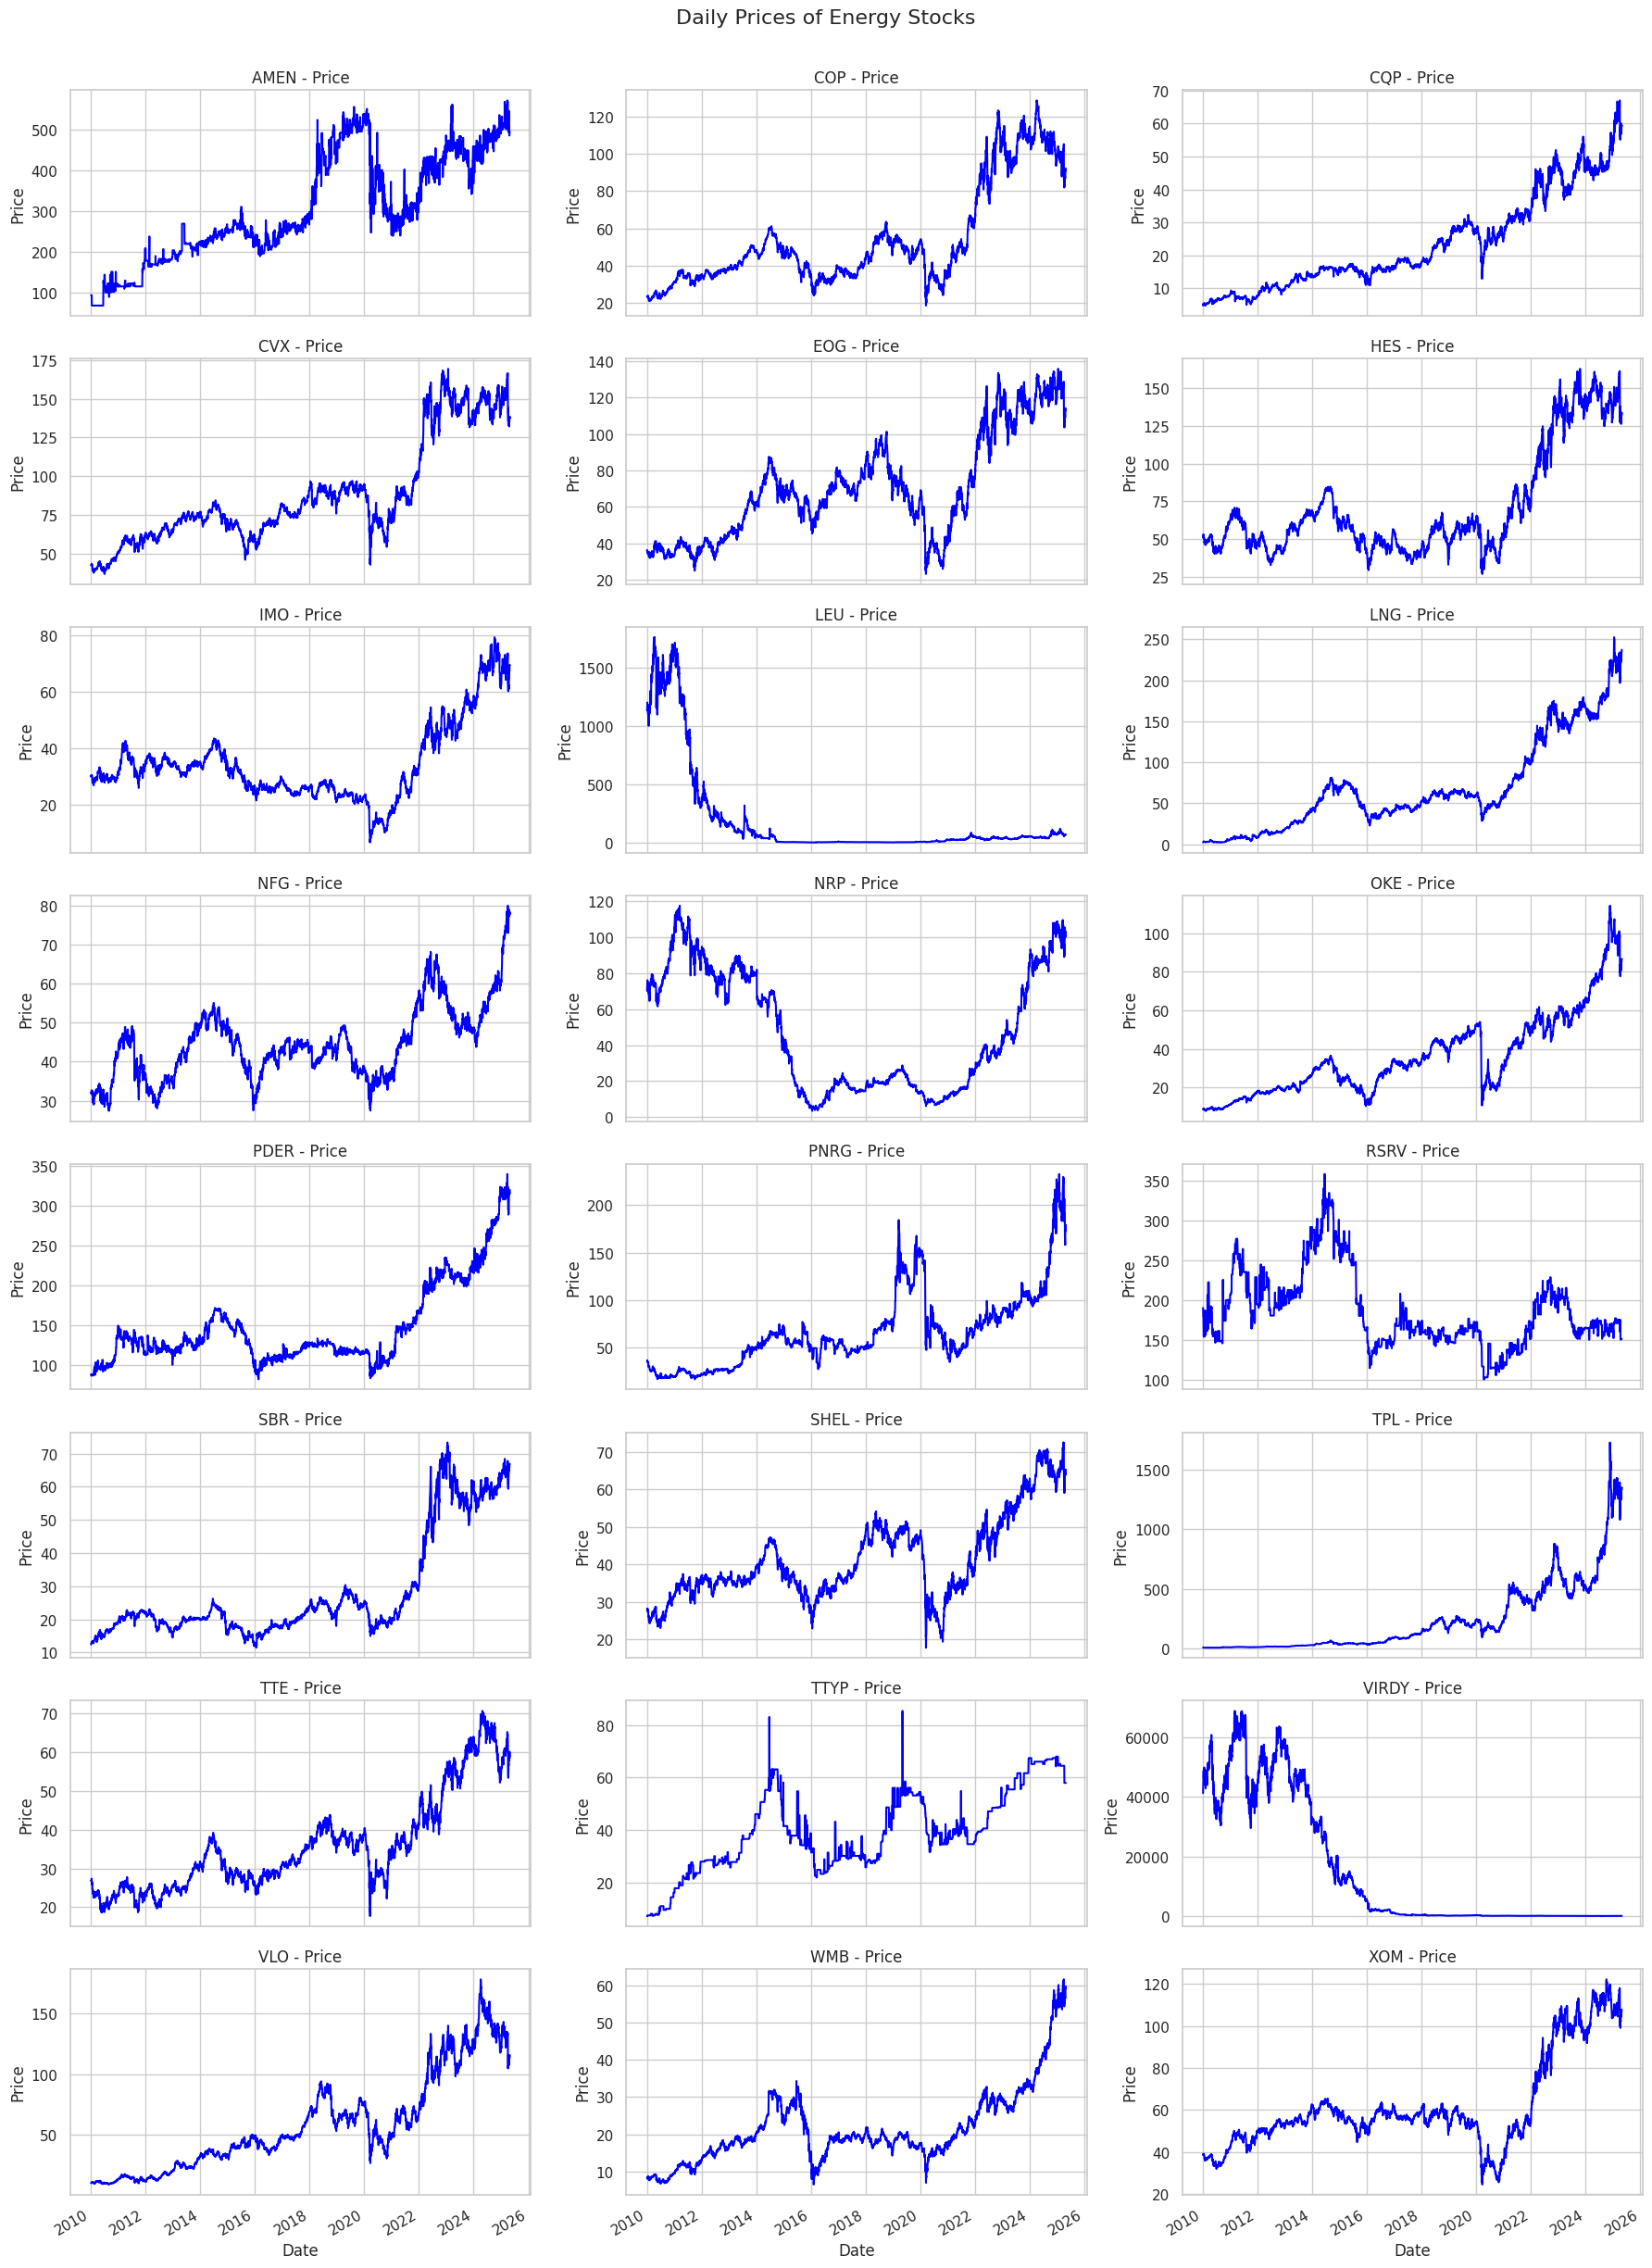

In [ ]:
tickers = Prices.columns
num_tickers = len(tickers)
cols = 3  # 3 columns in the subplot grid
rows = math.ceil(num_tickers / cols)

# Plot Prices
fig1, axes1 = plt.subplots(rows, cols, figsize=(18, rows * 3), sharex=True)
axes1 = axes1.flatten()

for i, ticker in enumerate(tickers):
    ax = axes1[i]
    Prices[ticker].plot(ax=ax, title=f"{ticker} - Price", color='blue')
    ax.set_ylabel("Price")
    ax.grid(True)

# Remove unused subplots
for j in range(i + 1, len(axes1)):
    fig1.delaxes(axes1[j])

plt.tight_layout()
plt.suptitle("Daily Prices of Energy Stocks", fontsize=16, y=1.02)
plt.show()

**Figure 1.1: Daily Prices Visualization**

The chart above outlines the daily trends of prices for 24 energy sector stocks throughout the years 2010 to 2024. Most stocks trend upward while being influenced by changes in different sectors and the economy. The fact that VIRDY, LEU and TPL display extreme price changes suggests that either they are very volatile or that there have been significant events with these companies. Certain stocks such as LNG, VLO and WMB, have performed well and consistently grown long-term, whereas RSRV and NRP show either ups or downs over the years.

### **3.2.2 Daily Returns Visualization**

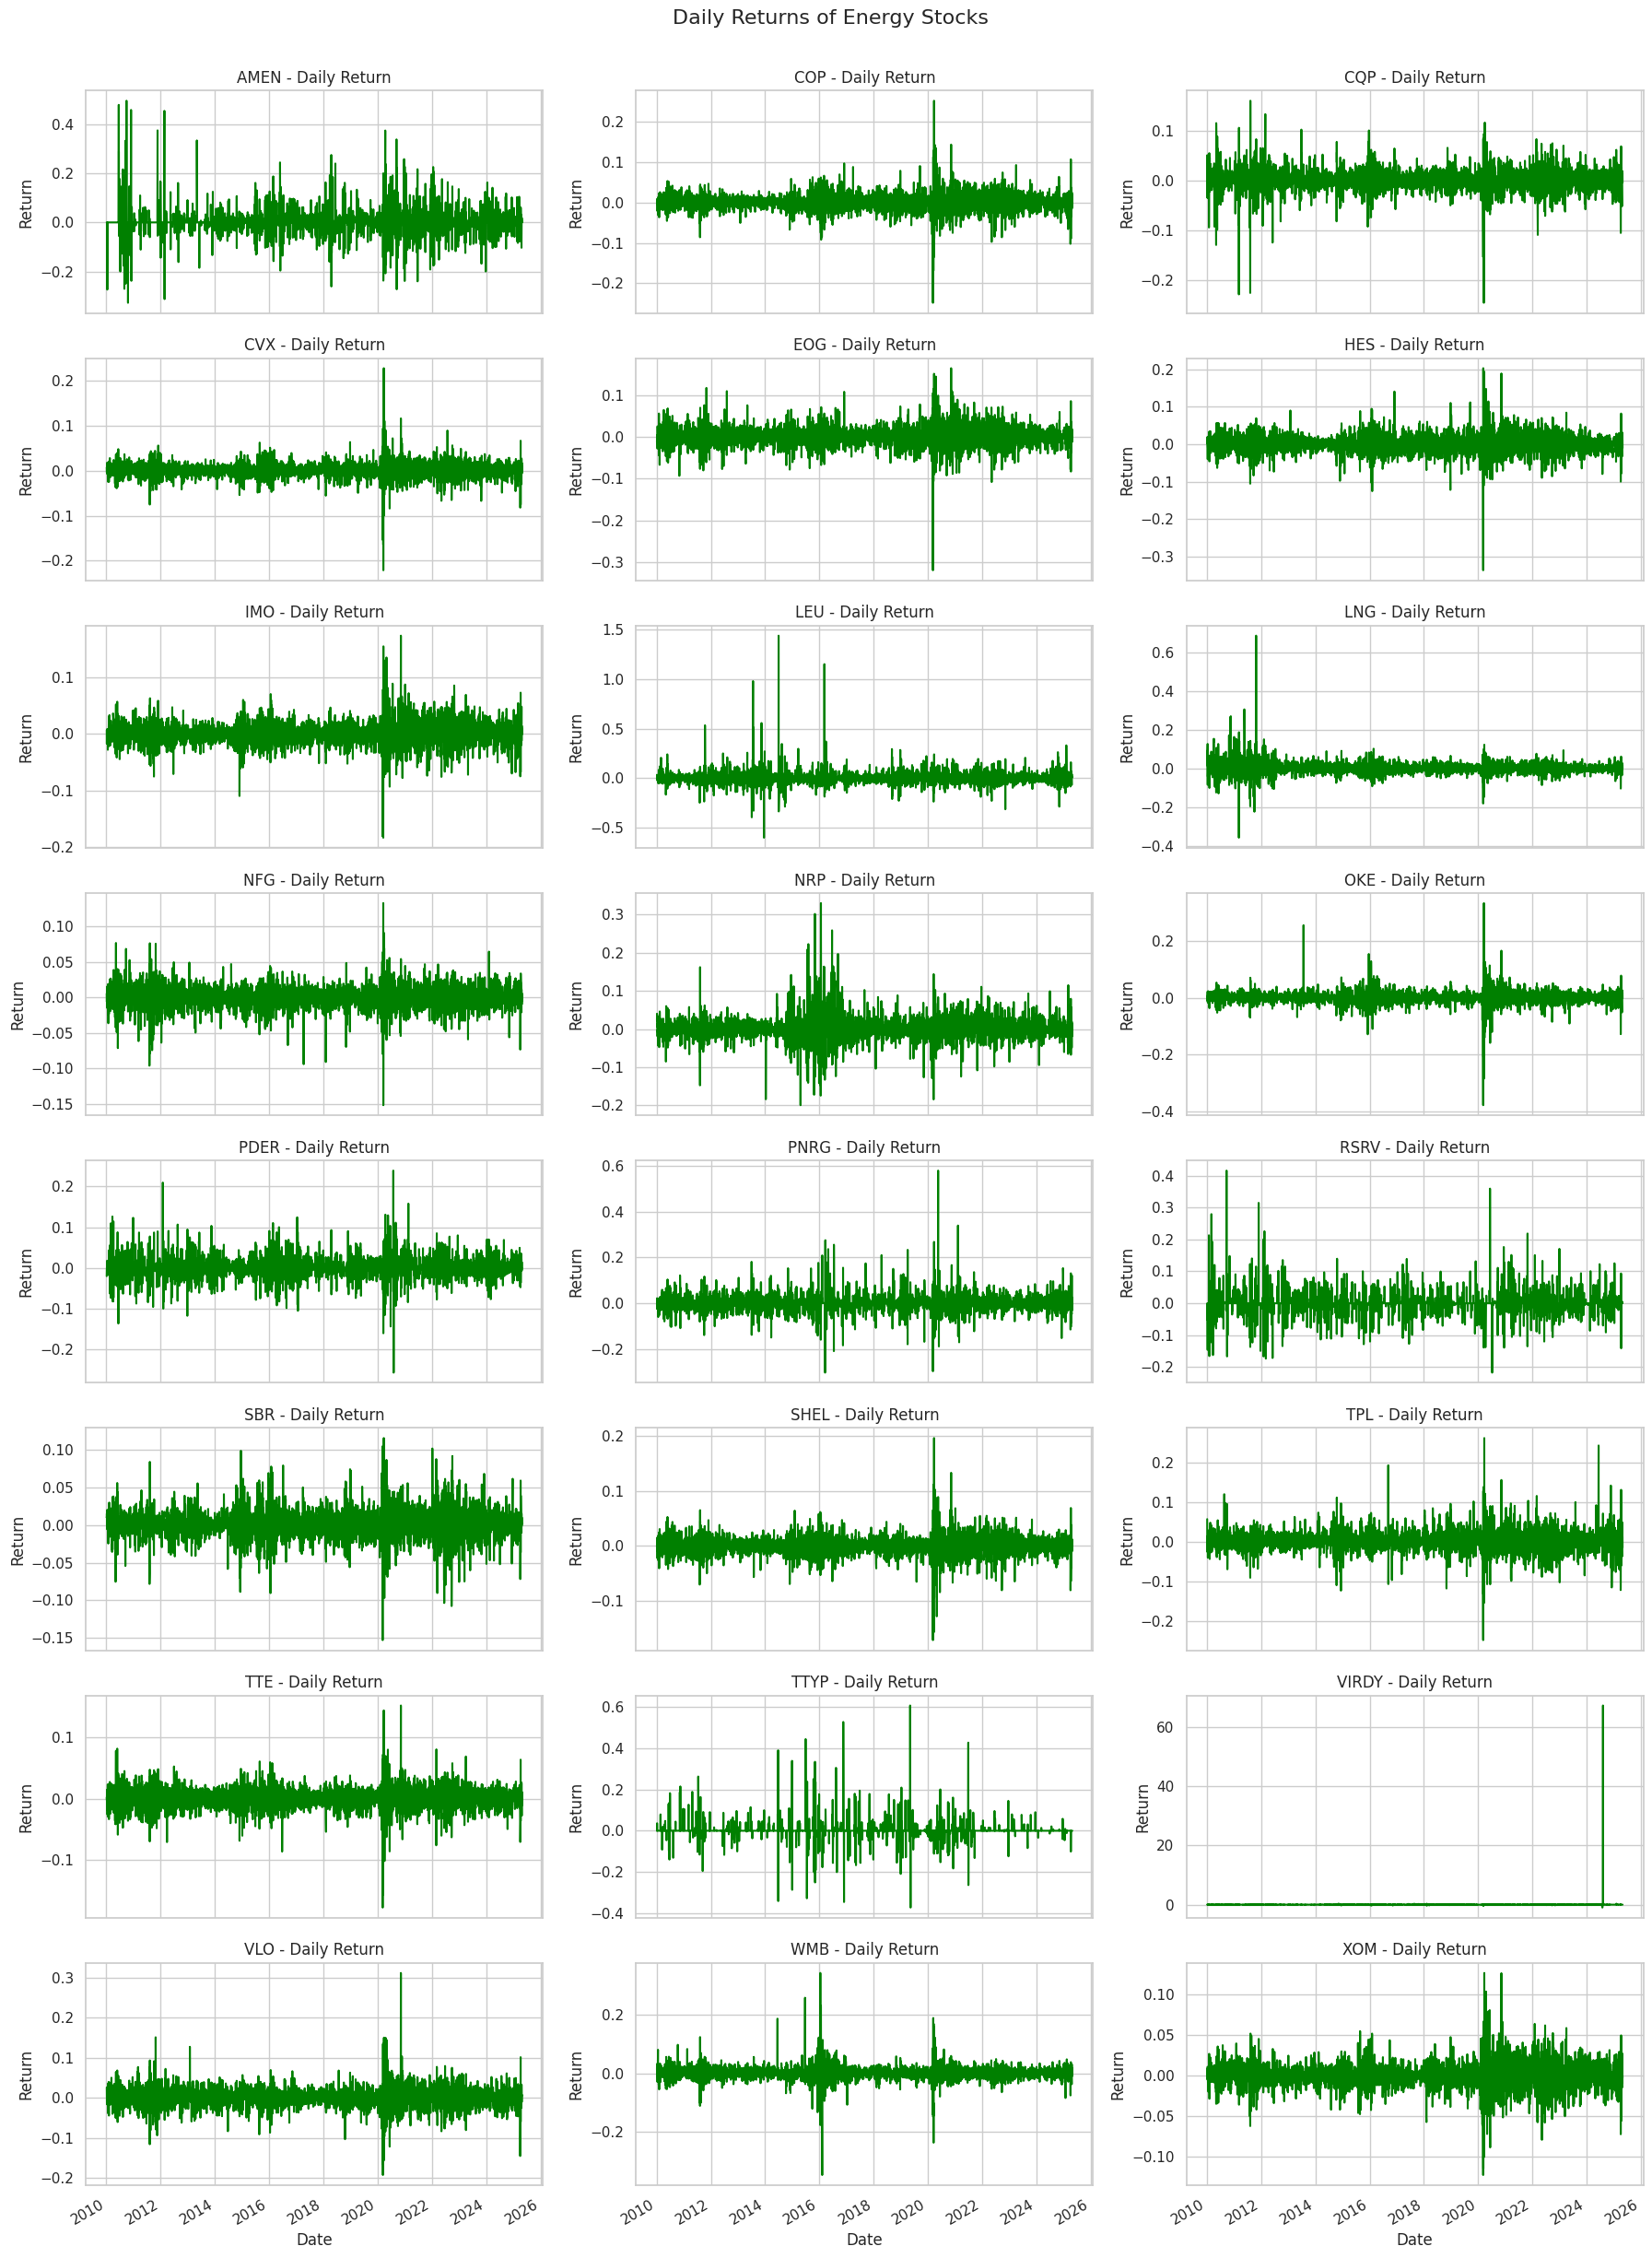

In [ ]:
# Plot Returns
fig2, axes2 = plt.subplots(rows, cols, figsize=(18, rows * 3), sharex=True)
axes2 = axes2.flatten()

for i, ticker in enumerate(tickers):
    ax = axes2[i]
    returns[ticker].plot(ax=ax, title=f"{ticker} - Daily Return", color='green')
    ax.set_ylabel("Return")
    ax.grid(True)

# Remove unused subplots
for j in range(i + 1, len(axes2)):
    fig2.delaxes(axes2[j])

plt.tight_layout()
plt.suptitle("Daily Returns of Energy Stocks", fontsize=16, y=1.02)
plt.show()


**Figure 3.2 Daily Returns Visualization**

The chart above provides daily returns of 24 energy sector stocks ranging from 2010 to 2024 and demonstrates their risk and volatility. While most stocks hover around zero with a few peak gains, you can see from LEU, VIRDY and RSRV that such stocks go through periods of extreme prices, revealing significant fluctuations. The return plots point out that the volatility in returns is not normal and changes during stressful times such as when the economy is distressed.

## **3.3 Correlation and Volatility Analysis**

### **3.3.1 Correlation Analysis of Returns**

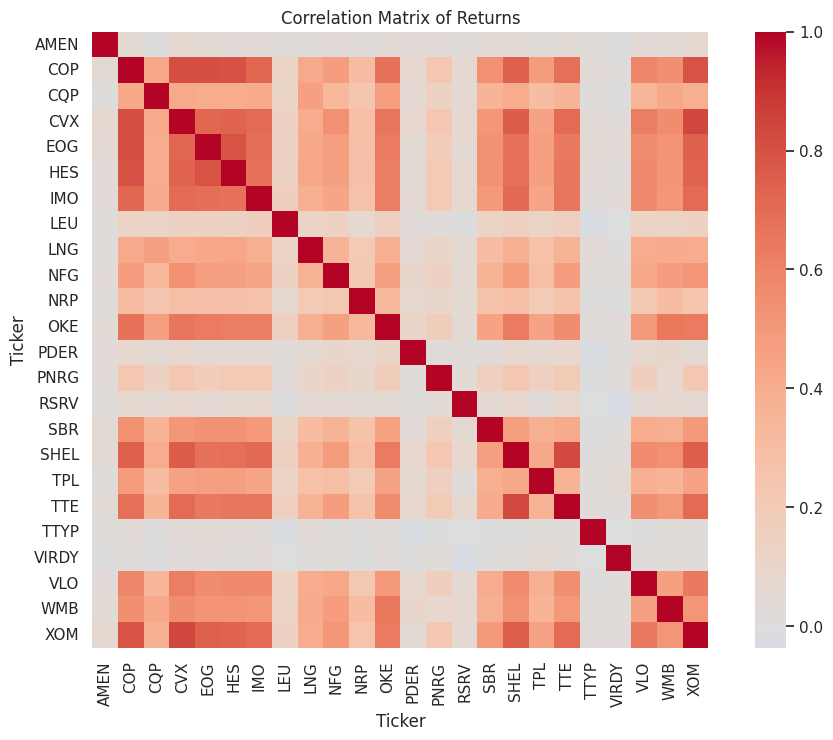

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = returns.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Returns')
plt.show()


**Figure 3.3 Daily Returns Correlation Heatmap**

Darker red on the heatmap points to the highest levels of positive correlation between daily returns of 24 energy stocks. Many stocks tend to have both moderate and high positive connections, especially CVX, XOM, EOG and HES since they operate in the same area. LEU, along with VIRDY and RSRV, do not move as closely with the rest and might be good choices for diversification. It allows us to locate groups of assets that travel together and plays an important role in both portfolio design and risk management.

### **3.3.2 Volatility Analysis of Returns**

In [ ]:
# Calculate volatility (standard deviation of returns)
volatility = returns.std()

# Sort by top 10 highest volatilities
top10_volatility = volatility.sort_values(ascending=False).head(10)

# Convert to DataFrame and transpose
top10_volatility_transposed = top10_volatility.to_frame().T

# Rename the index (row) to reflect the content
top10_volatility_transposed.index = ['Volatility']

# Display the result
top10_volatility_transposed


Ticker         VIRDY       LEU      AMEN      PNRG      TTYP       LNG  \
Volatility  1.084562  0.067393  0.045773  0.036116  0.035833  0.032146   

Ticker           NRP      RSRV       TPL      HES  
Volatility  0.030815  0.029687  0.026181  0.02526

**Table 3.2 Top 10 most volatile security**

The above table displays stocks in the energy sector that experience the most changes in their returns. Among the three, VIRDY has the most volatile returns (1.0846) which is far higher than seen in the other two options, where LEU and AMEN follow. Fast-changing stock prices usually promise higher rewards, but also carry more risk and doubts.

#### **3.3.2.1 Daily Volatility Analysis of Returns**

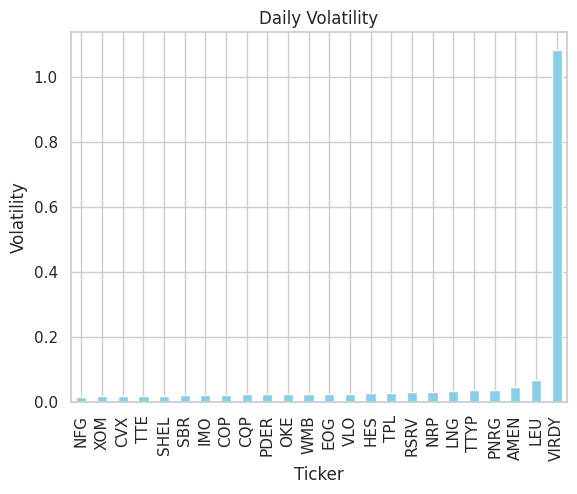

In [ ]:
volatility.sort_values().plot(kind='bar', color='skyblue', title="Daily Volatility")
plt.ylabel("Volatility")
plt.show()

**Figure 3.4 Daily Returns Volatility Chart**

On the daily volatility chart, the volatility of various stocks is shown and the majority are at relatively low and identical levels. The volatility of the symbol VIRDY is notably higher than the others which qualifies it as more volatile.

#### **3.3.2.2 Monthly Volatility Analysis of Returns**

<Axes: title={'center': 'Monthly Volatility'}, xlabel='Ticker'>

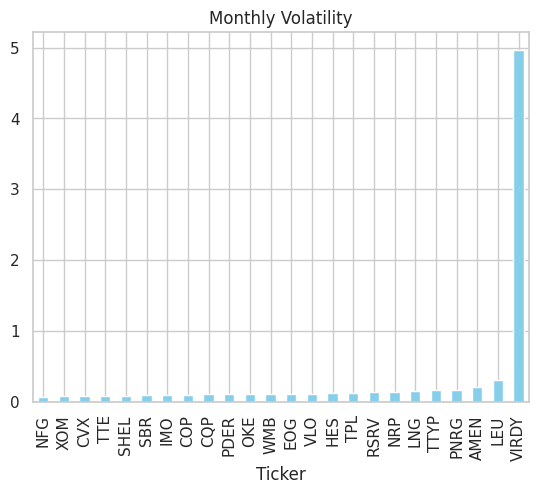

In [ ]:
volatility_month= returns.std()*np.sqrt(21)
volatility_month.sort_values().plot(kind='bar', color='skyblue', title="Monthly Volatility")

**Figure 3.4 Monthly Returns Volatility Chart**

The data in the monthly volatility chart suggests that stock tickers are generally volatility over the month. At the same time, VIRDY’s volatility of 5.0 is unusually high compared to all the other tickers. That means VIRDY’s price can change much more from month to month than that of its competitors.

#### **3.3.2.3 Annual Volatility Analysis of Returns**

<Axes: title={'center': 'Yearly Volatility'}, xlabel='Ticker'>

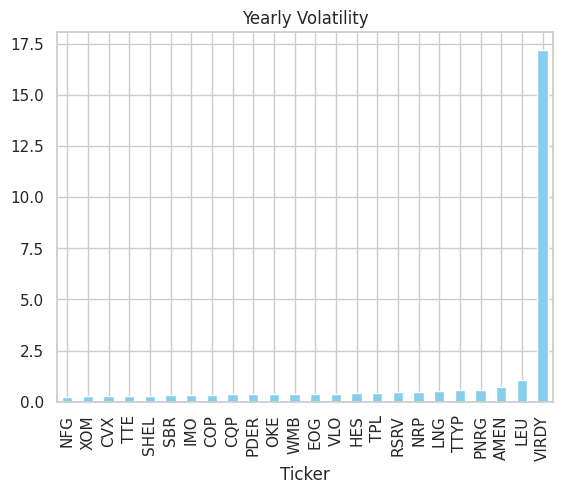

In [ ]:
volatility_annual= returns.std()*np.sqrt(252)
volatility_annual.sort_values().plot(kind='bar', color='skyblue', title="Yearly Volatility")

**Figure 3.5 Yearly Returns Volatility Chart**

Most tickers are shown to have relatively stable volatility throughout the year. Still, VIRDY is unique because it shows a yearly volatility of 17.5, much more than what any other crypto offers. This shows that VIRDY has a greater tendency to have large price changes over more extended periods than its peers.

## **3.4 Cumulative Returns Analysis**

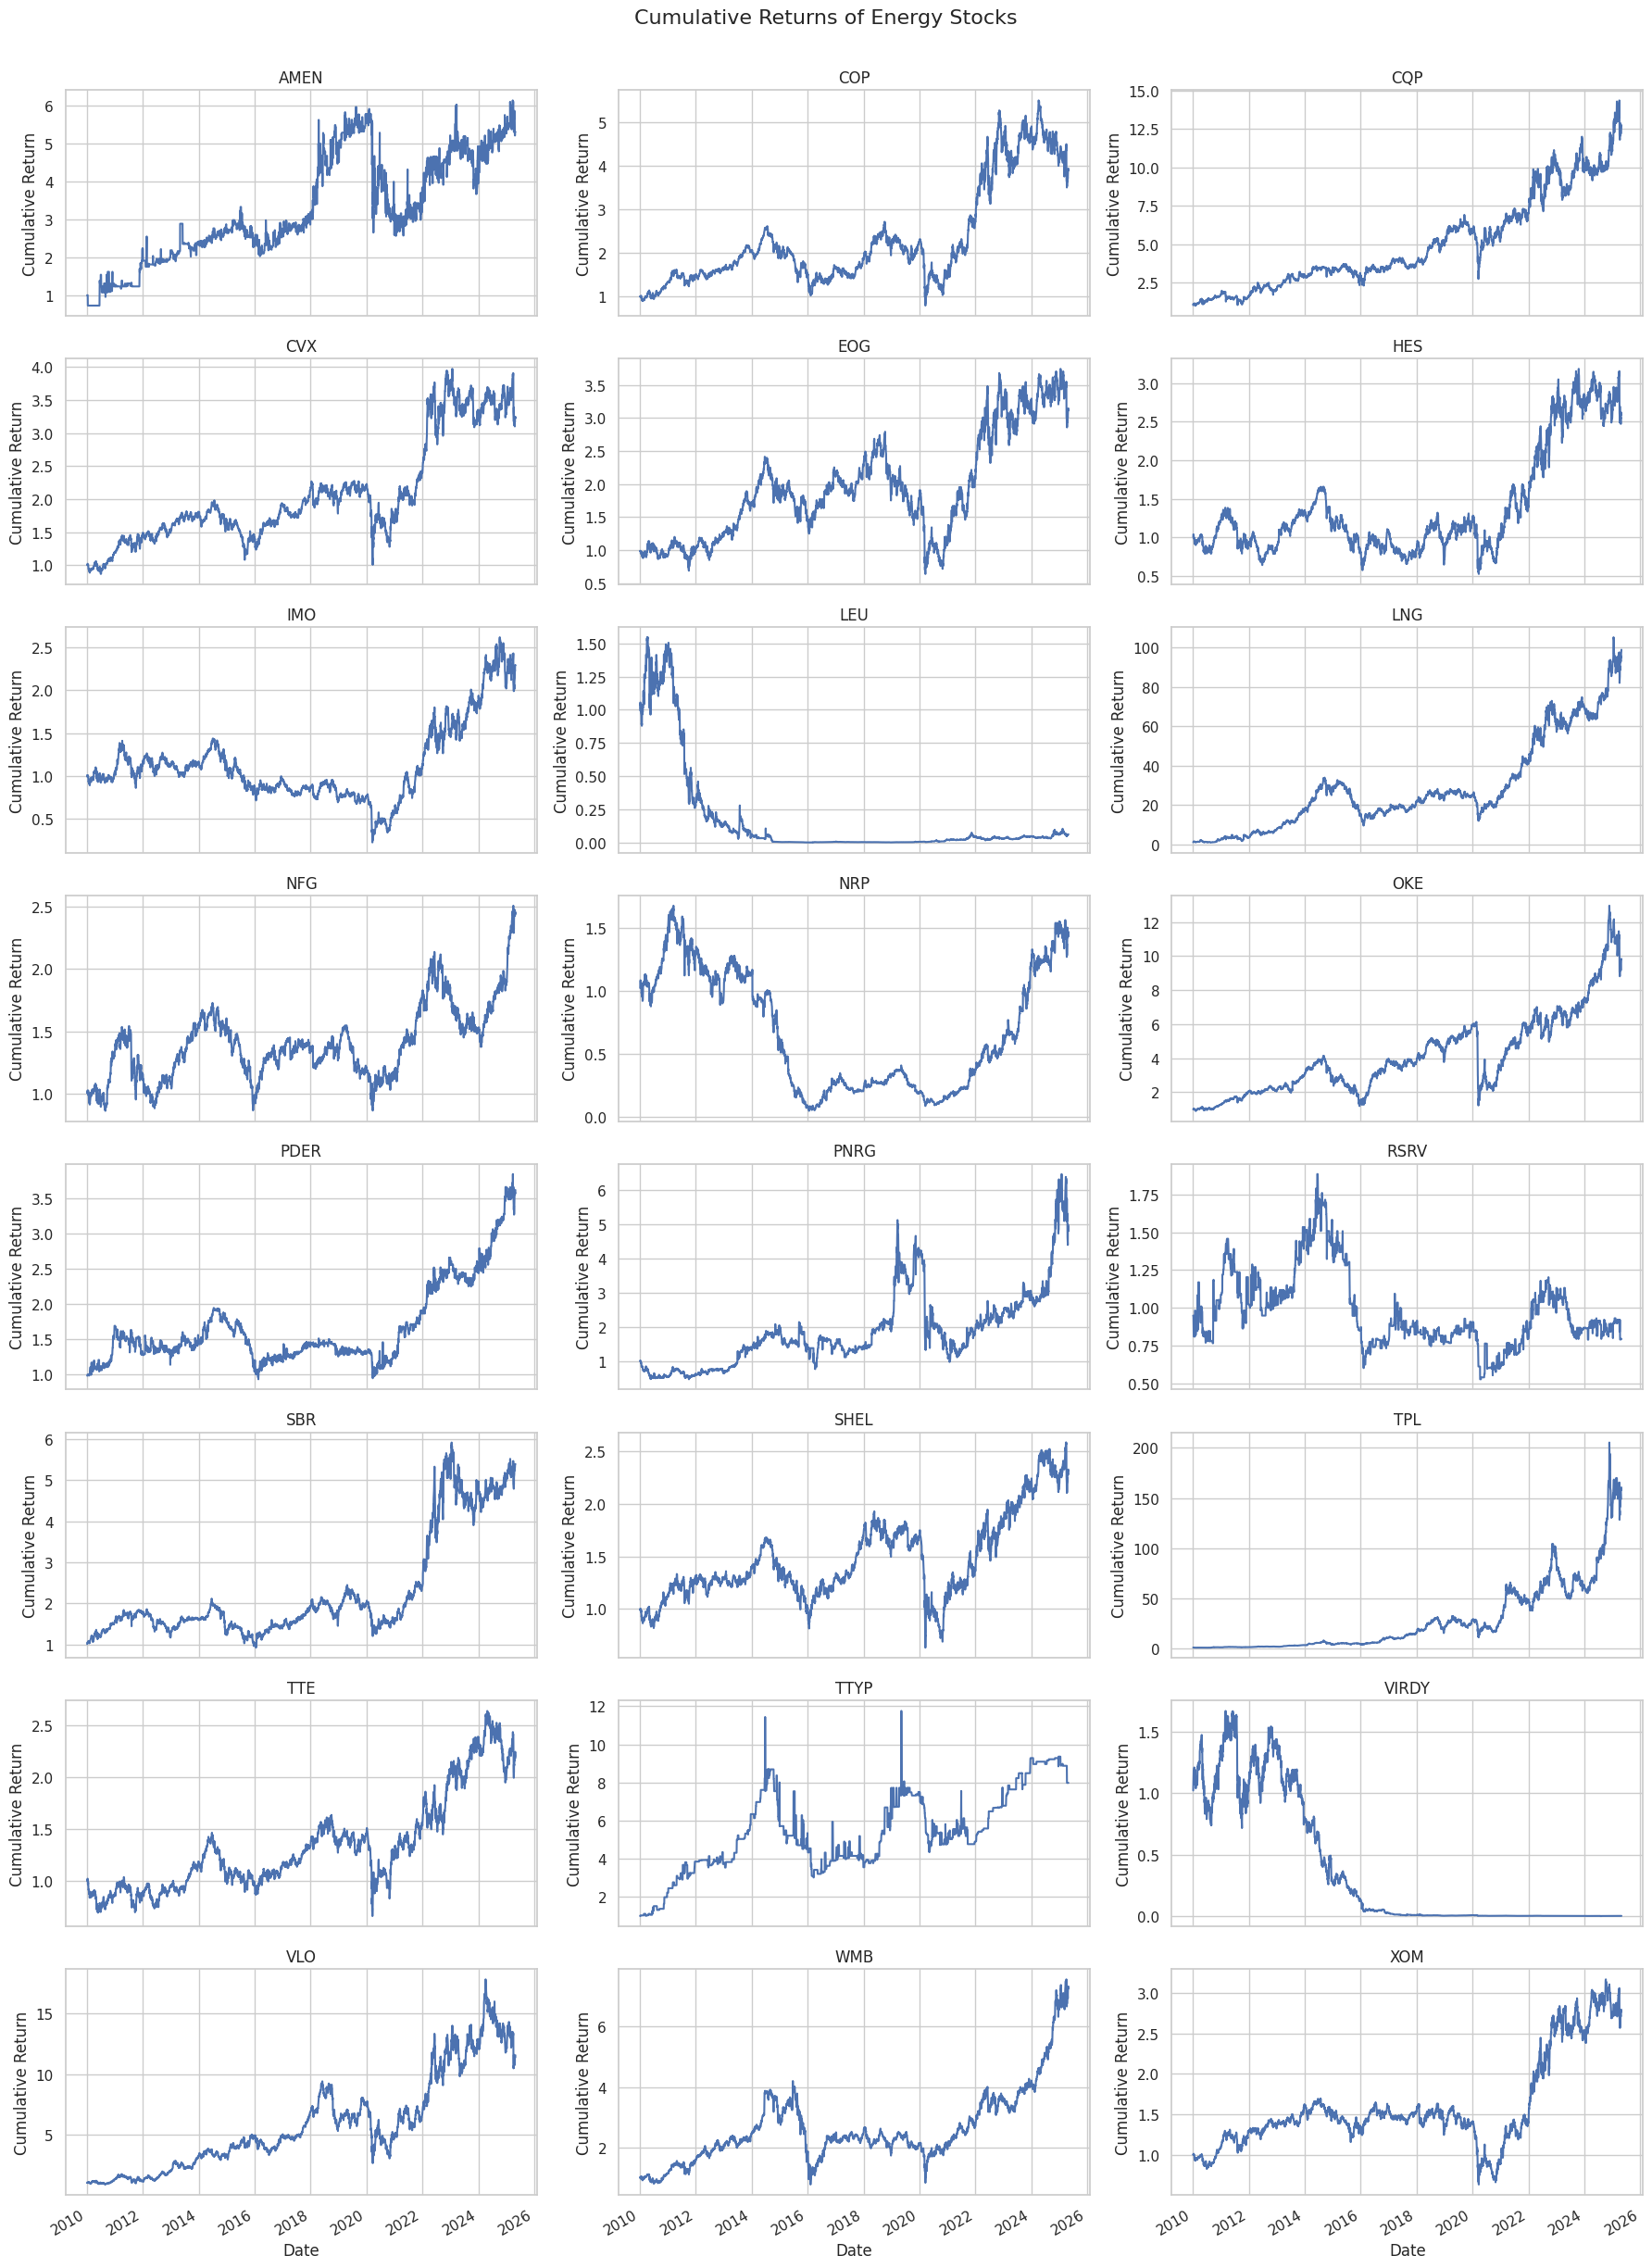

In [ ]:
cumulative_returns = (1 + returns).cumprod()

tickers = cumulative_returns.columns
num_tickers = len(tickers)

# Define subplot grid size (e.g., 3 columns)
cols = 3
rows = math.ceil(num_tickers / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3), sharex=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    ax = axes[i]
    cumulative_returns[ticker].plot(ax=ax, title=ticker)
    ax.set_ylabel("Cumulative Return")
    ax.grid(True)

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.suptitle("Cumulative Returns of Energy Stocks", fontsize=16, y=1.02)
plt.show()


**Figure 3.6 Cummulative returns Plot**

The chart above is  showing the returns of a number of energy stocks from 2010 to 2025. Every subplot reflects the performance of a stock and reveals its changing value over the years. For example, while TPL, LNG and VLO have performed well in the long term, LEU and VRDY have not fared as well. CVX, EOG and SBR have been rising over time but also face some unpredictability. In short, the chart highlights how these energy stocks have changed in value over the past decade.

## **3.5 Average Returns vs Volatility Analysis**

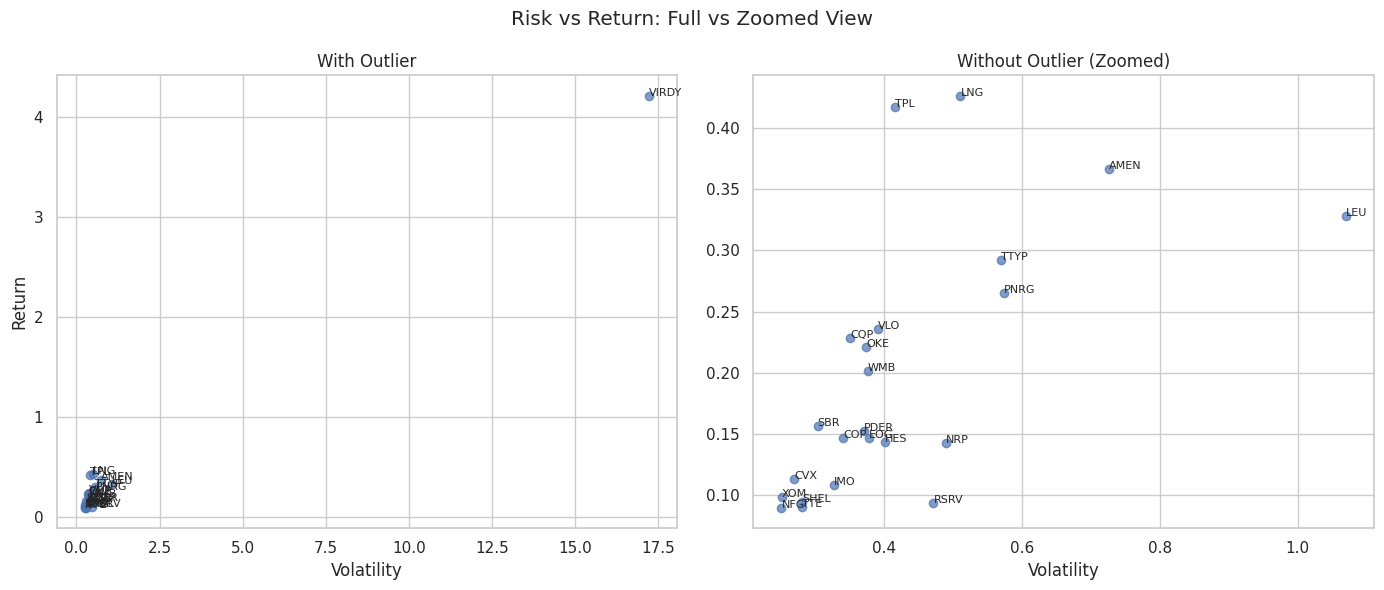

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot with outlier
avg_returns_all = returns.mean() * 252
volatility_all = returns.std() * np.sqrt(252)
axs[0].scatter(volatility_all, avg_returns_all, alpha=0.7)
for ticker in returns.columns:
    axs[0].text(volatility_all[ticker], avg_returns_all[ticker], ticker, fontsize=8)
axs[0].set_title('With Outlier')
axs[0].set_xlabel('Volatility')
axs[0].set_ylabel('Return')
axs[0].grid(True)

# Plot without outlier
returns_filtered = returns.drop(columns=["VIRDY"])
avg_returns_filt = returns_filtered.mean() * 252
volatility_filt = returns_filtered.std() * np.sqrt(252)
axs[1].scatter(volatility_filt, avg_returns_filt, alpha=0.7)
for ticker in returns_filtered.columns:
    axs[1].text(volatility_filt[ticker], avg_returns_filt[ticker], ticker, fontsize=8)
axs[1].set_title('Without Outlier (Zoomed)')
axs[1].set_xlabel('Volatility')
axs[1].grid(True)

plt.suptitle('Risk vs Return: Full vs Zoomed View')
plt.tight_layout()
plt.show()


The "Risk vs Return: "Full vs Zoomed View” chart shows comparative scatter plot analysis of annualized returns vs volatility for stocks of energy sector with two lenses (left: full view (with outlier); right: zoomed view (excluding the outlier)). In the full view, VRDN is a large outlier, with extremely high return (\~4.3) and volatility (\~17), that squashes a differentiation of the remaining data. The close-up panel creates a better resolution achieved by eliminating VRDN and allows to see the distribution of the remaining stocks more clearly.

In the zoomed view, stocks like TPL, LNG, AMEN exhibit good risk-return characteristics, high return and moderate volatility (> 0.35 returns and 0.4-0.7 volatility), making them good for portfolio inclusion. LEU also displays a relatively high return (\~0.33) but at the expense of greater volatility (\~1.05), meaning more risk. In the meantime, stocks, such as XOM, CVX, and SHEL swing close to the lower left, showing low returns and low risks, which is typical of more stable, blue-chip firms. This chart reinforces the risk-reward trade-off, where investors can find stocks that provide better returns at lower costs, failure to recognize this characteristic, can lead to anomalies that may skew a portfolio optimization process, if not eliminated properly.

**Figure 3.7 Average Returns vs Volatility Scatter Plot**

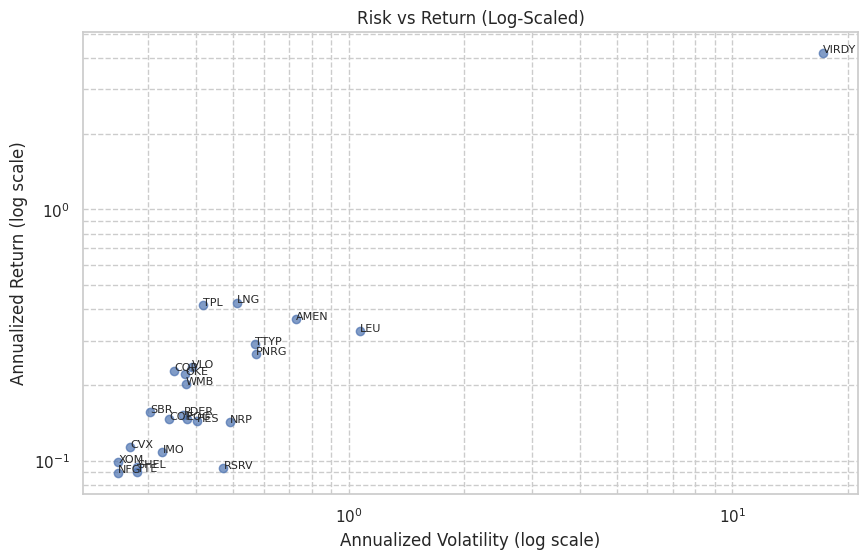

In [ ]:
avg_returns = returns.mean() * 252
volatility = returns.std() * np.sqrt(252)

plt.figure(figsize=(10, 6))
plt.scatter(volatility, avg_returns, alpha=0.7)
for ticker in returns.columns:
    plt.text(volatility[ticker], avg_returns[ticker], ticker, fontsize=8)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Annualized Volatility (log scale)')
plt.ylabel('Annualized Return (log scale)')
plt.title('Risk vs Return (Log-Scaled)')
plt.grid(True, which="both", ls="--")
plt.show()


## **3.6 Analysis of the Distressed Market Regime**

### **3.6.1 Prices and The Distressed Period**

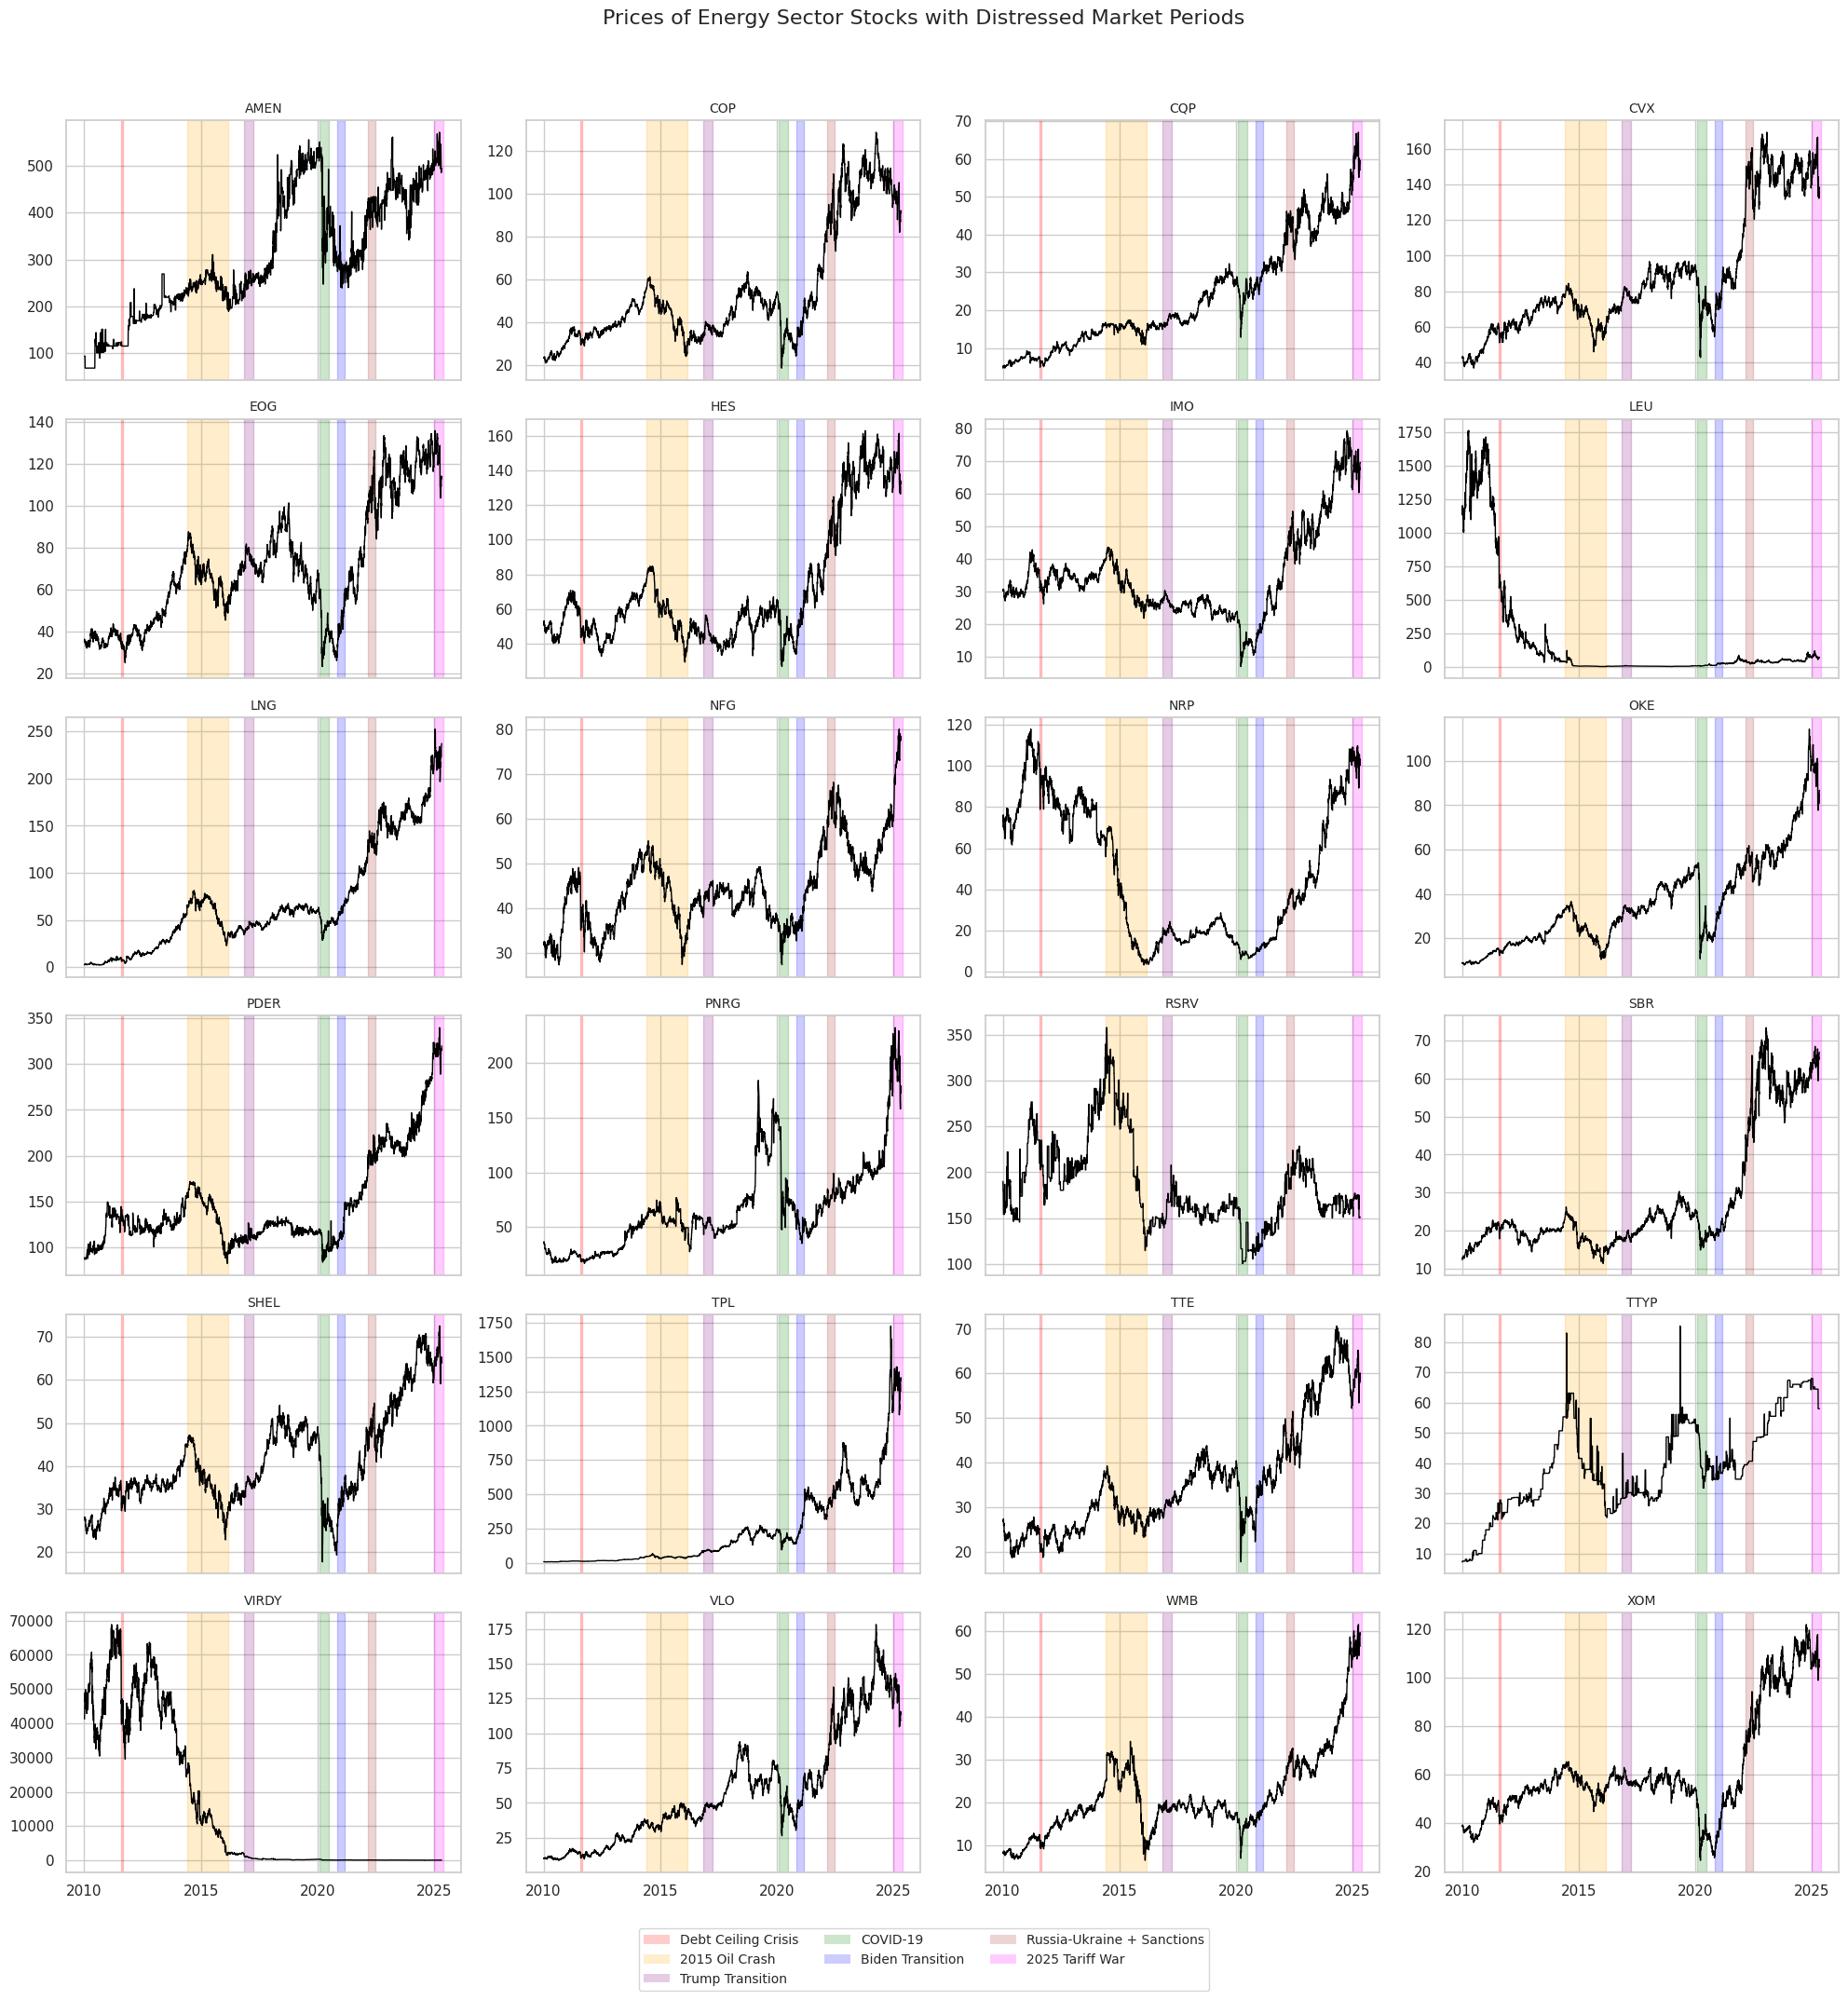

In [ ]:
# Define unique colors for each distressed period
distress_colors = [
    "red",           # 2011 Debt Ceiling
    "orange",        # 2015 Oil Crash
    "purple",        # Trump Transition
    "green",         # COVID-19
    "blue",          # Biden Transition
    "brown",         # Russia-Ukraine
    "magenta"        # 2025 Tariff War
]

# Define distress periods
distressed_periods = [
    ("2011-08-01", "2011-08-31", "Debt Ceiling Crisis"),
    ("2014-06-01", "2016-02-29", "2015 Oil Crash"),
    ("2016-11-01", "2017-03-31", "Trump Transition"),
    ("2020-02-01", "2020-06-30", "COVID-19"),
    ("2020-11-01", "2021-02-28", "Biden Transition"),
    ("2022-03-01", "2022-06-30", "Russia-Ukraine + Sanctions"),
    ("2025-01-01", pd.Timestamp.today().strftime('%Y-%m-%d'), "2025 Tariff War"),
]

# Setup grid
n_rows, n_cols = 6, 4
total_plots = len(Prices.columns)
pages = int(np.ceil(total_plots / (n_rows * n_cols)))
tickers = Prices.columns.tolist()

# Create legend handles only once
from matplotlib.patches import Patch
legend_handles = [
    Patch(facecolor=color, edgecolor='none', alpha=0.2, label=label)
    for (_, _, label), color in zip(distressed_periods, distress_colors)
]

for page in range(pages):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 22), sharex=True)
    axes = axes.flatten()

    start_idx = page * n_rows * n_cols
    end_idx = min(start_idx + n_rows * n_cols, total_plots)

    for i, idx in enumerate(range(start_idx, end_idx)):
        ticker = tickers[idx]
        ax = axes[i]

        # Plot cumulative return
        ax.plot(Prices.index, Prices[ticker], color='black', linewidth=1)
        ax.set_title(ticker, fontsize=10)
        ax.grid(True)

        # Add shaded distressed periods
        for (start, end, label), color in zip(distressed_periods, distress_colors):
            ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.2)

        # Format x-axis
        ax.xaxis.set_major_locator(mdates.YearLocator(5))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Add legend below all subplots
    fig.legend(handles=legend_handles, loc='lower center', ncol=3, fontsize=10, frameon=True, bbox_to_anchor=(0.5, 0.01))

    plt.suptitle("Prices of Energy Sector Stocks with Distressed Market Periods", fontsize=16)
    plt.tight_layout(rect=[0, 0.05, 1, 0.96])  # Leave space at bottom for legend
    plt.show()

**Figure 3.8 Prices vs Distressed Market Period Plot**

The contained chart titled as “Prices of Energy Sector Stocks with Distressed Market Periods” illustrates the historical price trends of 24 energy sector stocks over roughly 2010 and till early 2025, with the influence of the major economic and geopolitical shocks. Every subplot is the price movement for a particular stock, whereby uniquely colored shaded areas indicate seven major distressed periods like the 2011 Debt Ceiling Crisis, 2015 Oil Crash, COVID-19, Russia-Ukraine conflict and the current 2025 Tariff War. Such periods are constantly highlighted with colours for subplots and the legend at the chart bottom explains it.

From the analysis, periods of distress can occur during periods of increased volatility and price corrections. For instance, the 2015 Oil Crash and COVID – 19 Pandemic clearly show cases of slump or stagnation in most stocks. But post-crisis recoveries, especially after COVID-19, can also be noted with numerous stocks recording sharp rallies, most likely on the back of stimulus and recovery of oil demand. Even in distress, high-performing stocks such as LNG, TPL, XOM, and VLO show strong up moves meaning robust fundamentals or favourable positioning. Others, like LEU and VRDN, have erratic movements or severe drops, calling upon firm-specific weaknesses. Overall, the chart points to the asymmetrical shock that is imposed on the energy sector, some firms perform well and others are failing in periods of turbulence in the economy and politics.

### **3.6.2 Cumulative Returns and The Distressed Period**

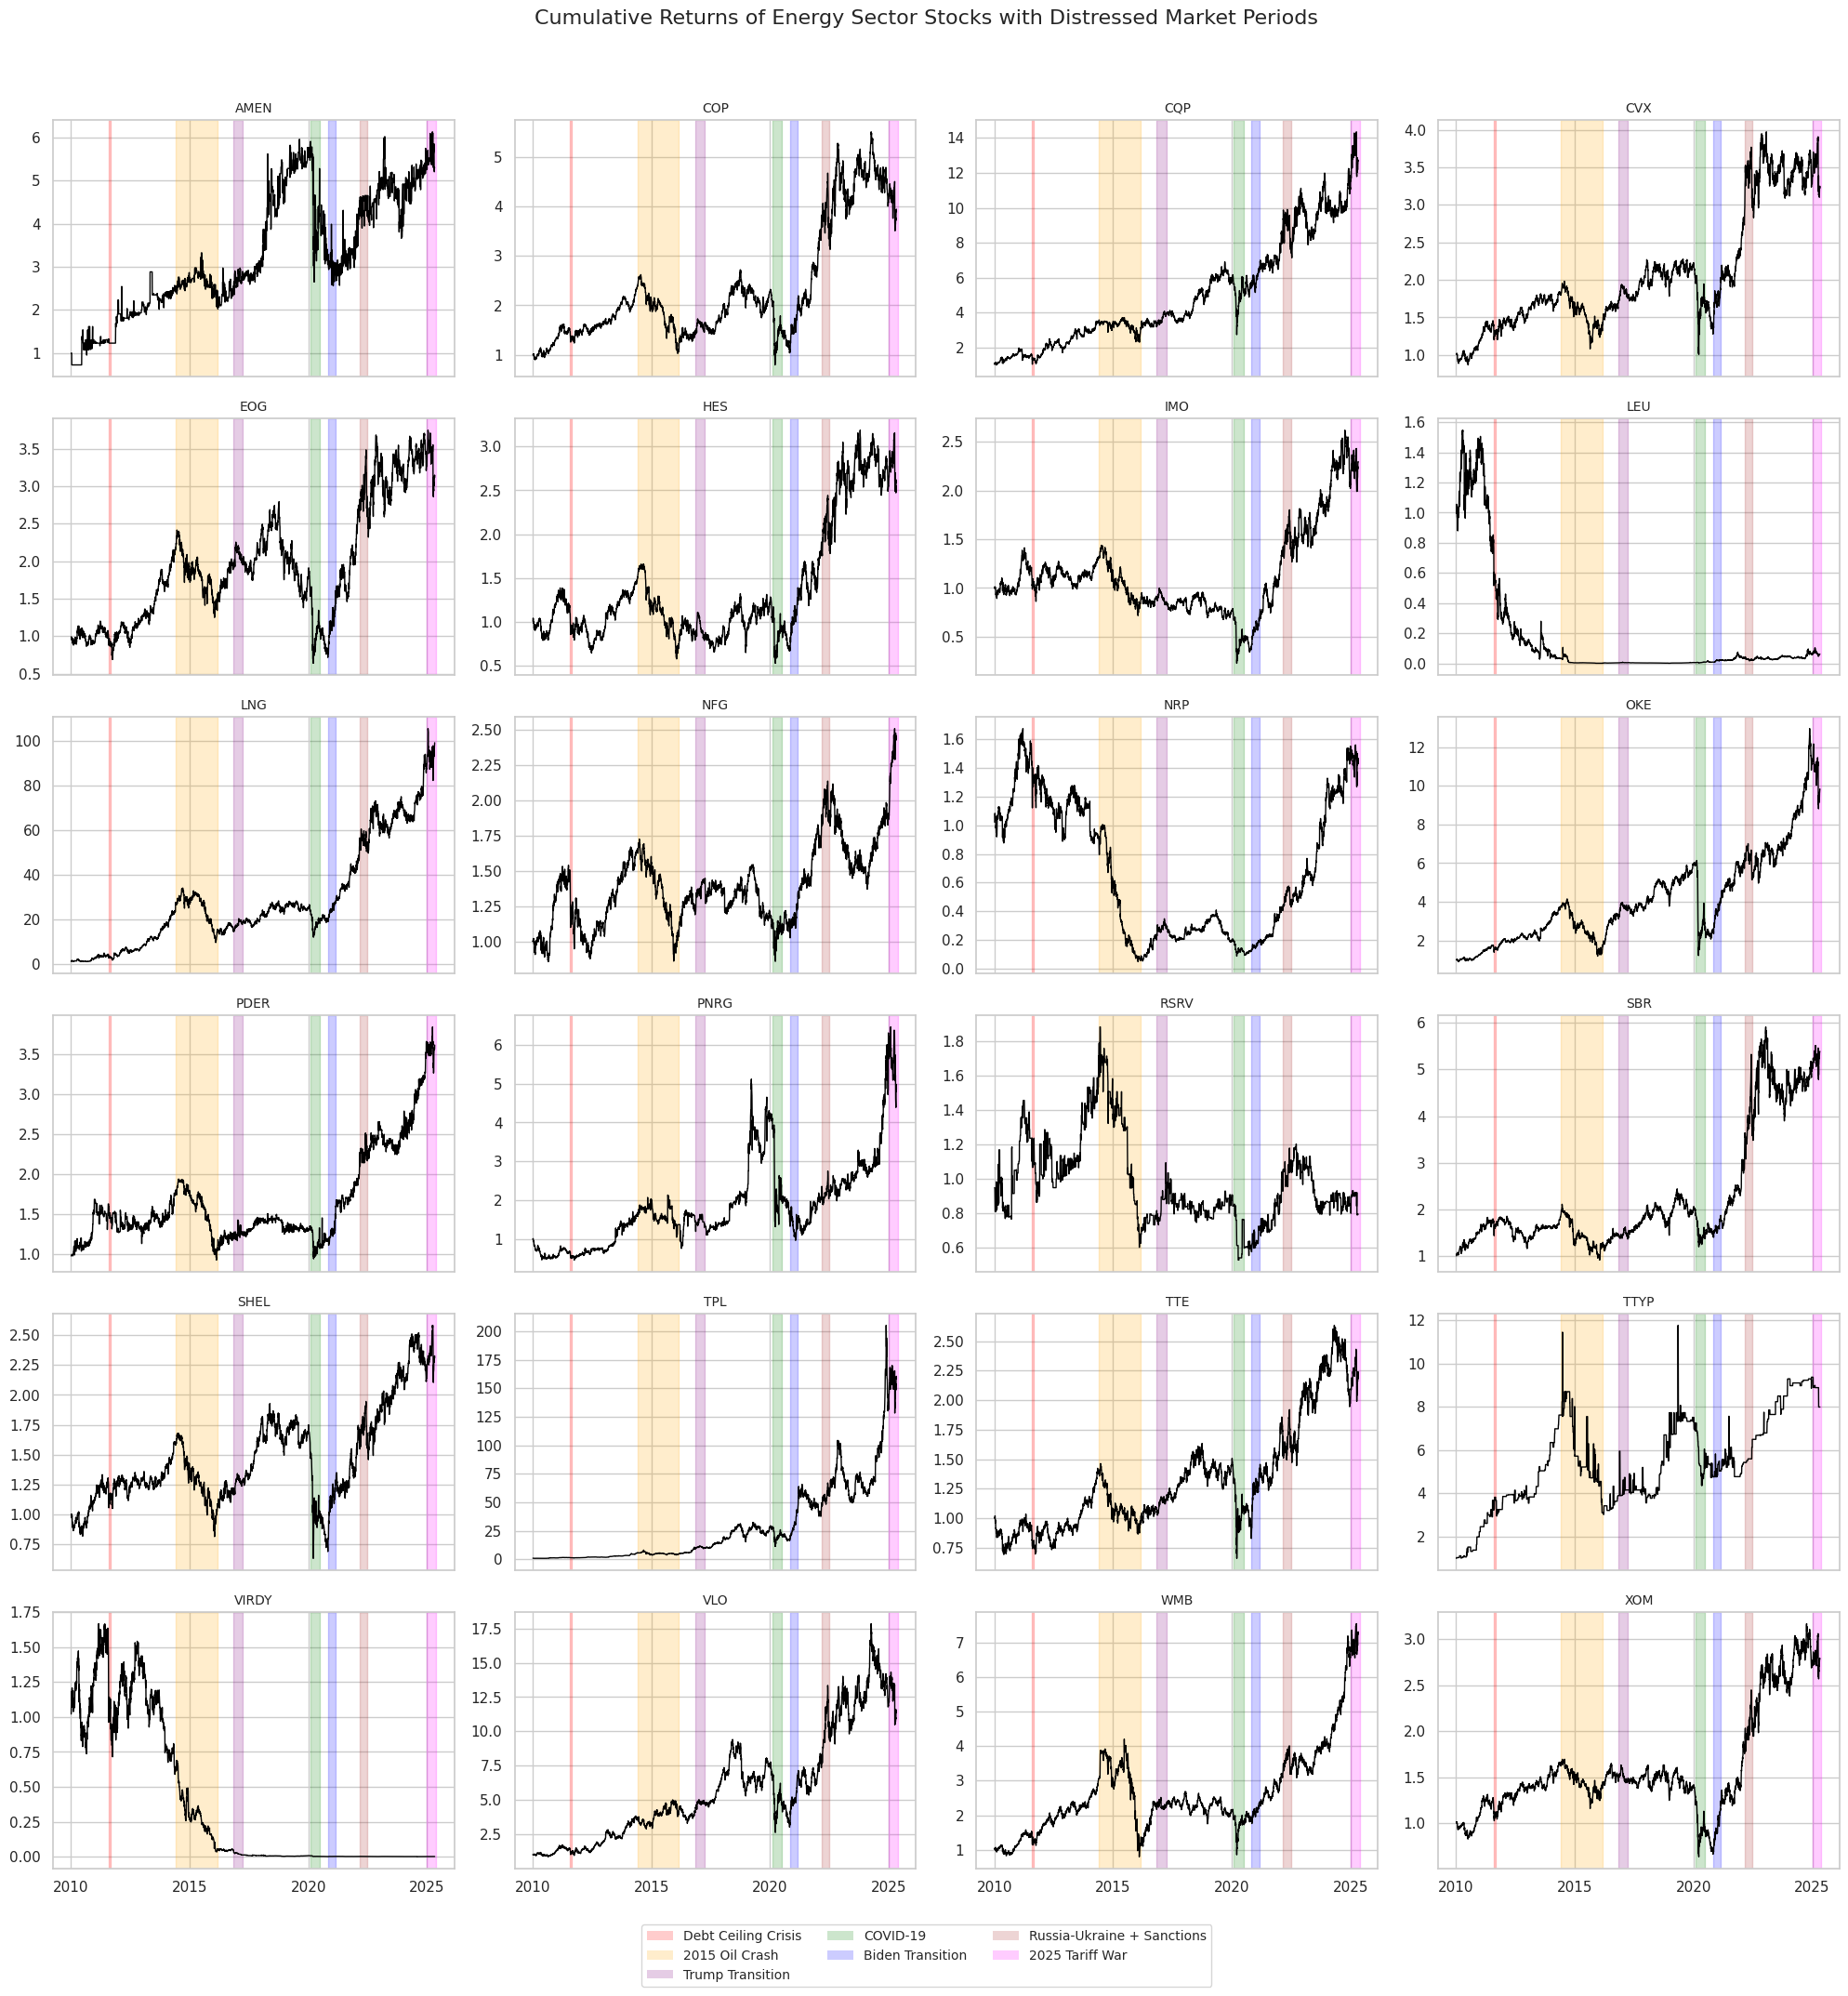

In [ ]:
# Define unique colors for each distressed period
distress_colors = [
    "red",           # 2011 Debt Ceiling
    "orange",        # 2015 Oil Crash
    "purple",        # Trump Transition
    "green",         # COVID-19
    "blue",          # Biden Transition
    "brown",         # Russia-Ukraine
    "magenta"        # 2025 Tariff War
]

# Define distress periods
distressed_periods = [
    ("2011-08-01", "2011-08-31", "Debt Ceiling Crisis"),
    ("2014-06-01", "2016-02-29", "2015 Oil Crash"),
    ("2016-11-01", "2017-03-31", "Trump Transition"),
    ("2020-02-01", "2020-06-30", "COVID-19"),
    ("2020-11-01", "2021-02-28", "Biden Transition"),
    ("2022-03-01", "2022-06-30", "Russia-Ukraine + Sanctions"),
    ("2025-01-01", pd.Timestamp.today().strftime('%Y-%m-%d'), "2025 Tariff War"),
]

# Setup grid
n_rows, n_cols = 6, 4
total_plots = len(cumulative_returns.columns)
pages = int(np.ceil(total_plots / (n_rows * n_cols)))
tickers = cumulative_returns.columns.tolist()

# Create legend handles only once
from matplotlib.patches import Patch
legend_handles = [
    Patch(facecolor=color, edgecolor='none', alpha=0.2, label=label)
    for (_, _, label), color in zip(distressed_periods, distress_colors)
]

for page in range(pages):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 22), sharex=True)
    axes = axes.flatten()

    start_idx = page * n_rows * n_cols
    end_idx = min(start_idx + n_rows * n_cols, total_plots)

    for i, idx in enumerate(range(start_idx, end_idx)):
        ticker = tickers[idx]
        ax = axes[i]

        # Plot cumulative return
        ax.plot(cumulative_returns.index, cumulative_returns[ticker], color='black', linewidth=1)
        ax.set_title(ticker, fontsize=10)
        ax.grid(True)

        # Add shaded distressed periods
        for (start, end, label), color in zip(distressed_periods, distress_colors):
            ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.2)

        # Format x-axis
        ax.xaxis.set_major_locator(mdates.YearLocator(5))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Add legend below all subplots
    fig.legend(handles=legend_handles, loc='lower center', ncol=3, fontsize=10, frameon=True, bbox_to_anchor=(0.5, 0.01))

    plt.suptitle("Cumulative Returns of Energy Sector Stocks with Distressed Market Periods", fontsize=16)
    plt.tight_layout(rect=[0, 0.05, 1, 0.96])  # Leave space at bottom for legend
    plt.show()


**Figure 3.9 Cummulative Returns vs Distressed Market Period Plot**

The chart labeled as “Cumulative Returns of Energy Sector Stocks with Distressed Market Periods” shows the performance of 24 energy sector stocks over the last almost 14 years in the beginning of 2025. Each subplot shows the accumulative gains of one stock, portraying how its price changes with time. Overlaid on the returns are seven different colour sections, each representing a major distressed market period: 2011 Debt Ceiling Crisis, 2015 Oil Crash, Trump then Biden transitions, COVID-19, Russia Ukraine – conflict with sanctions, and the current 2025 Tariff War. Each of these periods is differently shaded in different colors and is well-marked in the legend that is located under the chart.

From the analysis, we realize that most stocks registered extreme volatility during the distress periods. For example, the 2015 Oil Crash (orange) and COVID-19 (green) brought about strong declines or stagnation of many stock returns, indicating the fragility of the energy sector to global shocks. On the other hand, there are such periods with strong upward trends in many stocks, which are the post-COVID recovery and 2020–2021 political transitions, indicating the rebound effect or investor optimism. Interestingly enough, a select group of stocks such as LNG, TPL and XOM (stocks with outstanding long term growth where there are marked pickups even during a few distressed periods, indicating resilience, or genius, in testing times). All in all, the chart displays cyclicality of the energy sector and disparity in macroeconomic/geopolitical impact on individual firms.

# **4.0 Feature Engineering and Data Preprocessing**

At this stage, we designed many technical indicators using stock price data such as moving averages, Bollinger Bands, RSI, volatility, momentum and details about different price patterns. The indicators were figured out for different periods, to track market movements in both short and long timescales. Results focused on using lagged returns as things to be predicted. We then cleaned the final feature set by dropping NaNs from the rolling data and split the data by time, using everything prior to January 2019 for training and data from January 2019 and later for testing.

## **4.1. Feature Engineering**

### **4.1.1 Calculating Technical Indicators as Features**

In [ ]:
def calculate_technical_indicators(prices, window_sizes=[5, 10, 20, 50, 200]):
    """
    Calculate technical indicators for a list of stocks using log returns.
    prices: DataFrame with dates as index and stock tickers as columns
    window_sizes: list of window sizes for moving averages and other rolling calculations

    Returns: DataFrame with technical indicators
    """
    features = pd.DataFrame(index=prices.index)

    for ticker in prices.columns:
        close = prices[ticker]

        # 1. Log Returns
        features[f'{ticker}_log_return_1d'] = np.log(close / close.shift(1))
        features[f'{ticker}_log_return_5d'] = np.log(close / close.shift(5))
        features[f'{ticker}_log_return_20d'] = np.log(close / close.shift(20))

        # 2. Moving Averages
        for window in window_sizes:
            ma = close.rolling(window=window).mean()
            features[f'{ticker}_ma_{window}'] = ma
            features[f'{ticker}_close_to_ma_{window}_ratio'] = close / ma

        # 3. Bollinger Bands (using close prices)
        for window in [20, 50]:
            rolling_mean = close.rolling(window=window).mean()
            rolling_std = close.rolling(window=window).std()

            features[f'{ticker}_bb_upper_{window}'] = rolling_mean + (2 * rolling_std)
            features[f'{ticker}_bb_lower_{window}'] = rolling_mean - (2 * rolling_std)
            features[f'{ticker}_bb_width_{window}'] = (
                features[f'{ticker}_bb_upper_{window}'] - features[f'{ticker}_bb_lower_{window}']
            ) / rolling_mean

        # 4. Momentum Indicators
        # RSI
        for window in [14, 28]:
            delta = close.diff()
            gain = delta.where(delta > 0, 0)
            loss = -delta.where(delta < 0, 0)

            avg_gain = gain.rolling(window=window).mean()
            avg_loss = loss.rolling(window=window).mean()

            rs = avg_gain / avg_loss
            features[f'{ticker}_rsi_{window}'] = 100 - (100 / (1 + rs))

        # Rate of Change — optional log-based version
        features[f'{ticker}_roc_10'] = np.log(close / close.shift(10))
        features[f'{ticker}_roc_20'] = np.log(close / close.shift(20))

        # 5. Volatility (std of log returns)
        log_ret = np.log(close / close.shift(1))
        features[f'{ticker}_volatility_10'] = log_ret.rolling(window=10).std()
        features[f'{ticker}_volatility_20'] = log_ret.rolling(window=20).std()

        # 6. Price Patterns
        for window in [20, 50]:
            features[f'{ticker}_donchian_upper_{window}'] = close.rolling(window=window).max()
            features[f'{ticker}_donchian_lower_{window}'] = close.rolling(window=window).min()
            features[f'{ticker}_donchian_middle_{window}'] = (
                features[f'{ticker}_donchian_upper_{window}'] +
                features[f'{ticker}_donchian_lower_{window}']
            ) / 2

        # 7. Moving Average Crossovers
        features[f'{ticker}_ma_cross_5_20'] = (
            features[f'{ticker}_ma_5'] > features[f'{ticker}_ma_20']
        ).astype(int)

        # 8. Price Extremes
        features[f'{ticker}_close_10d_high'] = close.rolling(window=10).max() / close - 1
        features[f'{ticker}_close_10d_low'] = close.rolling(window=10).min() / close - 1

    # Drop rows with NA values (from rolling calculations)
    features = features.dropna()

    return features


In [ ]:
features = calculate_technical_indicators(Prices)

In [ ]:
features.head(2)

AMEN_log_return_1d  AMEN_log_return_5d  AMEN_log_return_20d  \
Date                                                                      
2010-11-09            0.000000            0.137419            -0.259511   
2010-11-10            0.048202            0.185621            -0.211309   

             AMEN_ma_5  AMEN_close_to_ma_5_ratio  AMEN_ma_10  \
Date                                                           
2010-11-09  110.344530                  1.054138  105.864129   
2010-11-10  114.480289                  1.066232  107.932008   

            AMEN_close_to_ma_10_ratio  AMEN_ma_20  AMEN_close_to_ma_20_ratio  \
Date                                                                           
2010-11-09                   1.098752  113.503808                   1.024797   
2010-11-10                   1.130921  112.067778                   1.089185   

            AMEN_ma_50  ...  XOM_volatility_20  XOM_donchian_upper_20  \
Date                    ...                                             
2010-11-09  117.386879  ...           0.009013              40.459293   
2010-11-10  118.047453  ...           0.009028              40.745697   

            XOM_donchian_lower_20  XOM_donchian_middle_20  \
Date                                                        
2010-11-09              37.024014               38.741653   
2010-11-10              37.069561               38.907629   

            XOM_donchian_upper_50  XOM_donchian_lower_50  \
Date                                                       
2010-11-09              40.459293              33.648373   
2010-11-10              40.745697              34.468079   

            XOM_donchian_middle_50  XOM_ma_cross_5_20  XOM_close_10d_high  \
Date                                                                        
2010-11-09               37.053833                  1                 0.0   
2010-11-10               37.606888                  1                 0.0   

            XOM_close_10d_low  
Date                           
2010-11-09          -0.076043  
2010-11-10          -0.074854  

[2 rows x 816 columns]

The technical indicators computed indicators are vital in finance because they help experts understand how the stock market works and influence trading steps. First, logarithmic returns are used since they help track prices and can be counted together in models and statistics (Tsay, 2010). After that, the system finds the moving averages for different window sizes which help settle price changes and search for trends and close-to-moving-average ratios suggest signs of the market being overbought or oversold (Murphy, 1999). Using the rolling mean and standard deviation, the Bollinger Bands indicate the normal range while also highlighting when prices may be ready to reverse. The Relative Strength Index and similar indicators evaluate the strength of recent changes in the market to pinpoint when the price is moving high or low (Wilder, 1978). Additionally, ROC calculates a signal by comparing log differentials over specific time periods.

It further predicts volatility by measuring the standard deviation of log returns over periods of time (Hull, 2017). Donchian Channels are used to identify times market prices break out by highlighting former highs and lows and moving average crossovers (for example MA 5 going above MA 20) are used to indicate a change in the trend, used regularly in algorithmic trading (Chan, 2013). Lastly, a price extreme obtained by comparing the stock price to the last 10 days can signal a change in momentum or the chance to buy a dip. When all these indicators are combined, they help machine learning and trading models forecast the market by describing how the market behaves.

### **4.1.1 Calculating Log Returns as Targets**

In [ ]:
targets = np.log(Prices / Prices.shift(1)).dropna()
targets.head(2)

Ticker      AMEN       COP       CQP       CVX       EOG       HES       IMO  \
Date                                                                           
2010-01-05   0.0  0.000950  0.037136  0.007058 -0.012329  0.006156  0.006317   
2010-01-06   0.0  0.007194  0.026799  0.000125  0.003323  0.002671  0.004775   

Ticker           LEU       LNG       NFG  ...      RSRV       SBR      SHEL  \
Date                                      ...                                 
2010-01-05 -0.004831  0.015936  0.005709  ... -0.052186  0.010598  0.001122   
2010-01-06  0.033336  0.087012  0.002156  ...  0.000000  0.009775 -0.008204   

Ticker           TPL       TTE  TTYP     VIRDY       VLO       WMB       XOM  
Date                                                                          
2010-01-05  0.055097  0.002274   0.0  0.021053  0.025388  0.012417  0.003896  
2010-01-06 -0.025668 -0.000302   0.0  0.017639  0.024759  0.031935  0.008606  

[2 rows x 24 columns]

Our target variable computation uses logarithmic returns by taking the logarithm of the ratio of today’s price to the price from yesterday. Many practitioners in finance prefer log returns because their cumulative property, statistical ease and normality property make them better suited to most econometrics models (Tsay, 2010). Log returns are preferred over simple returns since they are easier to fold together, are balanced for gains and losses alike and offer suitability to risk modeling and forecasting in the financial sector.

## **4.2 Data Preprocessing: Data Cleaning and Splitting**

In [ ]:
def split_data(features, targets, test_start='2019-01-01'):
    """
    Split data into training and testing sets
    """
    X_train = features[features.index < test_start]
    X_test = features[features.index >= test_start]

    y_train = targets[targets.index < test_start]
    y_test = targets[targets.index >= test_start]

    # Ensure we have matching indices
    common_indices = X_train.index.intersection(y_train.index)
    X_train, y_train = X_train.loc[common_indices], y_train.loc[common_indices]

    common_indices = X_test.index.intersection(y_test.index)
    X_test, y_test = X_test.loc[common_indices], y_test.loc[common_indices]

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = split_data(features, targets, test_start='2019-01-01')

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1395, 816)
(1076, 816)
(1395, 24)
(1076, 24)


The split_data step separates the data into parts for training and testing starting from the date 2019-01-01. It guarantees all the timestamps between the features and the target sets are the same. The training set turns out to contain 1,395 observations, with 816 features and 24 targets and the test set consists of 1,076 rows containing the same details. It makes the data ready for use in supervised machine learning.

# **5.0 Model Training and Evaluation**

During this part, we worked on creating, training and testing machine learning models for predicting returns in the energy sector. In this experiment, Gradient Boosting Regressor (GBR) and Long Short-Term Memory (LSTM) were used as model types. The data used in training was preprocessed and included return targets. The trained models were evaluated by calculating Mean Absolute Error (MAE), Mean Squared Error (MSE) and R-squared (R²).

## **5.1 Gradient Boosting Regressor (GBR)**

We choose to work with a MultiOutputRegressor wrapped around a GradientBoostingRegressor to deal with various stock return KPIs. The model was set up with the chosen hyperparameters (such as 200 estimators, 0.05 learning rate and max depth 4) and then trained with the feature set. Both the training and test sets were analyzed using per-stock MSE and R² values that were safeguarded for missing data. We used Optuna to fine-tune the settings to boost the success rate of the model.

### **5.1.1 Model Training and Evaluation**

In [ ]:
# Initialize and train model
model = MultiOutputRegressor(
    GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        min_samples_split=10,
        random_state=42
    ),
    n_jobs=-1
)

model.fit(X_train, y_train)

# Evaluation function with NaN checks
def safe_evaluate_model(model, X, y, set_name="Train"):
    """Evaluation with additional data validation"""
    # Final NaN check
    if X.isna().any().any() or y.isna().any().any():
        raise ValueError(f"{set_name} set contains NaN values")

    preds = model.predict(X)

    # Calculate metrics for each stock
    mse = mean_squared_error(y, preds, multioutput='raw_values')
    r2 = r2_score(y, preds, multioutput='raw_values')

    print(f"\n{set_name} Set Performance:")
    for i, stock in enumerate(y.columns):
        print(f"{stock}: MSE={mse[i]:.6f}, R²={r2[i]:.4f}")

    return preds

# Run evaluation
try:
    train_preds = safe_evaluate_model(model, X_train, y_train, "Train")
    test_preds = safe_evaluate_model(model, X_test, y_test, "Test")
except ValueError as e:
    print(f"Evaluation failed: {str(e)}")
    print("Debugging info:")
    print("X_train NA count:", X_train.isna().sum().sum())
    print("y_train NA count:", y_train.isna().sum().sum())
    print("X_test NA count:", X_test.isna().sum().sum())
    print("y_test NA count:", y_test.isna().sum().sum())


Train Set Performance:
AMEN: MSE=0.000000, R²=1.0000
COP: MSE=0.000000, R²=1.0000
CQP: MSE=0.000000, R²=1.0000
CVX: MSE=0.000000, R²=1.0000
EOG: MSE=0.000000, R²=1.0000
HES: MSE=0.000000, R²=1.0000
IMO: MSE=0.000000, R²=1.0000
LEU: MSE=0.000000, R²=1.0000
LNG: MSE=0.000000, R²=1.0000
NFG: MSE=0.000000, R²=1.0000
NRP: MSE=0.000000, R²=1.0000
OKE: MSE=0.000000, R²=1.0000
PDER: MSE=0.000000, R²=1.0000
PNRG: MSE=0.000000, R²=1.0000
RSRV: MSE=0.000000, R²=1.0000
SBR: MSE=0.000000, R²=1.0000
SHEL: MSE=0.000000, R²=1.0000
TPL: MSE=0.000000, R²=1.0000
TTE: MSE=0.000000, R²=1.0000
TTYP: MSE=0.000000, R²=1.0000
VIRDY: MSE=0.000000, R²=1.0000
VLO: MSE=0.000000, R²=1.0000
WMB: MSE=0.000000, R²=1.0000
XOM: MSE=0.000000, R²=1.0000

Test Set Performance:
AMEN: MSE=0.000061, R²=0.9780
COP: MSE=0.000086, R²=0.8990
CQP: MSE=0.000028, R²=0.9530
CVX: MSE=0.000082, R²=0.8470
EOG: MSE=0.000115, R²=0.8833
HES: MSE=0.000088, R²=0.9161
IMO: MSE=0.000095, R²=0.8772
LEU: MSE=0.001224, R²=0.5816
LNG: MSE=0.00001

In [ ]:
def safe_evaluate_model(model, X, y, set_name="Train"):
    """Evaluation with additional data validation and DataFrame return"""
    if X.isna().any().any() or y.isna().any().any():
        raise ValueError(f"{set_name} set contains NaN values")

    preds = model.predict(X)

    # Calculate metrics
    mse = mean_squared_error(y, preds, multioutput='raw_values')
    r2 = r2_score(y, preds, multioutput='raw_values')

    # Create DataFrame
    results_df = pd.DataFrame({
        'Stock': y.columns,
        'MSE': mse,
        'R2': r2,
        'Dataset': set_name
    })

    return preds, results_df
try:
    train_preds, train_eval_df = safe_evaluate_model(model, X_train, y_train, "Train")
    test_preds, test_eval_df = safe_evaluate_model(model, X_test, y_test, "Test")

    # Combine into one table
    eval_df = pd.concat([train_eval_df, test_eval_df], axis=0).reset_index(drop=True)
    print(eval_df)

except ValueError as e:
    print(f"Evaluation failed: {str(e)}")
    print("Debugging info:")
    print("X_train NA count:", X_train.isna().sum().sum())
    print("y_train NA count:", y_train.isna().sum().sum())
    print("X_test NA count:", X_test.isna().sum().sum())
    print("y_test NA count:", y_test.isna().sum().sum())

    Stock           MSE        R2 Dataset
0    AMEN  3.402884e-08  0.999978   Train
1     COP  1.565447e-09  0.999995   Train
2     CQP  4.264985e-09  0.999990   Train
3     CVX  6.545309e-10  0.999996   Train
4     EOG  1.147054e-09  0.999997   Train
5     HES  3.107741e-09  0.999994   Train
6     IMO  1.490988e-09  0.999994   Train
7     LEU  1.981106e-07  0.999960   Train
8     LNG  9.981688e-09  0.999989   Train
9     NFG  1.681368e-09  0.999992   Train
10    NRP  1.043567e-08  0.999992   Train
11    OKE  2.195797e-09  0.999994   Train
12   PDER  2.040868e-09  0.999996   Train
13   PNRG  2.050889e-08  0.999982   Train
14   RSRV  2.772841e-09  0.999996   Train
15    SBR  1.225612e-09  0.999996   Train
16   SHEL  7.338926e-10  0.999996   Train
17    TPL  3.443478e-09  0.999993   Train
18    TTE  9.098493e-10  0.999996   Train
19   TTYP  1.643882e-08  0.999992   Train
20  VIRDY  2.413525e-08  0.999988   Train
21    VLO  2.091746e-09  0.999995   Train
22    WMB  3.403025e-08  0.999955 

**Table 5.1 Initial Model Performance**

The GBR model shows overfitting, with strong but varying generalization on the test set across stocks. We will proceed next to fine-tune using Optuna

### **5.1.2 Model Fine Tuning with Optuna**

In [ ]:
for ticker in tickers:
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 500),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 50),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 30),
            'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
            'random_state': 42
        }
        model = GradientBoostingRegressor(**params)
        model.fit(X_train, y_train[ticker])
        y_pred = model.predict(X_test)
        return mean_squared_error(y_test[ticker], y_pred)

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)
    best_model = GradientBoostingRegressor(**study.best_params).fit(X_train[ticker], y_train[ticker])

[I 2025-05-20 08:47:39,741] A new study created in memory with name: no-name-8028f067-cf42-4d8f-90cd-7e467a59efe5
[I 2025-05-20 08:47:43,697] Trial 0 finished with value: 0.0016479571873383298 and parameters: {'n_estimators': 460, 'learning_rate': 0.13367417971837495, 'max_depth': 9, 'subsample': 0.9868163524176499, 'min_samples_split': 31, 'min_samples_leaf': 24, 'max_features': 'log2'}. Best is trial 0 with value: 0.0016479571873383298.
[I 2025-05-20 08:47:48,938] Trial 1 finished with value: 0.0009226830884081915 and parameters: {'n_estimators': 287, 'learning_rate': 0.25826059449600874, 'max_depth': 8, 'subsample': 0.7572539001313302, 'min_samples_split': 37, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.0009226830884081915.
[I 2025-05-20 08:47:55,072] Trial 2 finished with value: 0.0011538777650154856 and parameters: {'n_estimators': 442, 'learning_rate': 0.25790147013539505, 'max_depth': 8, 'subsample': 0.6073144729403899, 'min_samples_split': 40,

In [ ]:
# for ticker in tickers:
#     def objective(trial):
#         params = {
#             'n_estimators': trial.suggest_int('n_estimators', 100, 500),
#             'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
#             'max_depth': trial.suggest_int('max_depth', 3, 10),
#             'subsample': trial.suggest_float('subsample', 0.6, 1.0),
#             'min_samples_split': trial.suggest_int('min_samples_split', 2, 50),
#             'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 30),
#             'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
#             'random_state': 42
#         }
#         model = GradientBoostingRegressor(**params)
#         model.fit(X_train, y_train[ticker])
#         y_pred = model.predict(X_test)
#         return mean_squared_error(y_test[ticker], y_pred)

#     study = optuna.create_study(direction='minimize')
#     study.optimize(objective, n_trials=50)


In [ ]:
print("Best trial:")
print("  Value (Avg. MSE):", study.best_trial.value)
print("  Params: ")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

Best trial:
  Value (Avg. MSE): 2.4949634650407698e-05
  Params: 
    n_estimators: 461
    learning_rate: 0.012425267665250038
    max_depth: 4
    subsample: 0.7194121196368499
    min_samples_split: 30
    min_samples_leaf: 2
    max_features: None


The best set of parameters for optuna, giving a low average MSE and better performance model.

### **5.1.3 Model With Finetuned Parameters**

In [ ]:
# Initialize and train model
gbr_model = MultiOutputRegressor(
    GradientBoostingRegressor(
        n_estimators = 464,
        learning_rate = 0.02005063897116349,
        max_depth = 8,
        subsample = 0.6136604249731817,
        min_samples_split = 34,
        min_samples_leaf = 2,
        max_features = None,
        random_state=42
    ),
    n_jobs=-1
)

gbr_model.fit(X_train, y_train)

# Evaluation function with NaN checks
def safe_evaluate_model(model, X, y, set_name="Train"):
    """Evaluation with additional data validation"""
    # Final NaN check
    if X.isna().any().any() or y.isna().any().any():
        raise ValueError(f"{set_name} set contains NaN values")

    preds = model.predict(X)

    # Calculate metrics for each stock
    mse = mean_squared_error(y, preds, multioutput='raw_values')
    r2 = r2_score(y, preds, multioutput='raw_values')

    print(f"\n{set_name} Set Performance:")
    for i, stock in enumerate(y.columns):
        print(f"{stock}: MSE={mse[i]:.6f}, R²={r2[i]:.4f}")

    return preds

# Run evaluation
try:
    train_preds = safe_evaluate_model(gbr_model, X_train, y_train, "Train")
    test_preds = safe_evaluate_model(gbr_model, X_test, y_test, "Test")
except ValueError as e:
    print(f"Evaluation failed: {str(e)}")
    print("Debugging info:")
    print("X_train NA count:", X_train.isna().sum().sum())
    print("y_train NA count:", y_train.isna().sum().sum())
    print("X_test NA count:", X_test.isna().sum().sum())
    print("y_test NA count:", y_test.isna().sum().sum())

In [ ]:
def safe_evaluate_model(model, X, y, set_name="Train"):
    """Evaluation with additional data validation and DataFrame return"""
    if X.isna().any().any() or y.isna().any().any():
        raise ValueError(f"{set_name} set contains NaN values")

    preds = model.predict(X)

    # Calculate metrics
    mse = mean_squared_error(y, preds, multioutput='raw_values')
    r2 = r2_score(y, preds, multioutput='raw_values')

    # Create DataFrame
    results_df = pd.DataFrame({
        'Stock': y.columns,
        'MSE': mse,
        'R2': r2,
        'Dataset': set_name
    })

    return preds, results_df
try:
    train_preds, train_eval_df = safe_evaluate_model(model, X_train, y_train, "Train")
    test_preds, test_eval_df = safe_evaluate_model(model, X_test, y_test, "Test")

    # Combine into one table
    eval_df = pd.concat([train_eval_df, test_eval_df], axis=0).reset_index(drop=True)
    print(eval_df)

except ValueError as e:
    print(f"Evaluation failed: {str(e)}")
    print("Debugging info:")
    print("X_train NA count:", X_train.isna().sum().sum())
    print("y_train NA count:", y_train.isna().sum().sum())
    print("X_test NA count:", X_test.isna().sum().sum())
    print("y_test NA count:", y_test.isna().sum().sum())

**Table 5.2 Final Model Output Comparison**

The model closely fit the training data and performs well on the test data for most stocks. But LEU and VIRDY Stock did not predict as accurately. So there is more work to be done

In [ ]:
gbr_preds_df = pd.DataFrame(test_preds, index=y_test.index, columns=y_test.columns)

gbr_preds_df.head(2)

Ticker          AMEN       COP       CQP       CVX       EOG       HES  \
Date                                                                     
2019-01-02  0.048855  0.016390 -0.010512  0.017405  0.038252  0.041268   
2019-01-03  0.000073 -0.019181  0.007731 -0.019261 -0.007076  0.003505   

Ticker           IMO       LEU       LNG       NFG  ...          RSRV  \
Date                                                ...                 
2019-01-02  0.008961  0.006341  0.016859 -0.006050  ...  4.361038e-03   
2019-01-03 -0.011307  0.000018  0.001141  0.010798  ...  2.524332e-07   

Ticker           SBR      SHEL       TPL       TTE      TTYP     VIRDY  \
Date                                                                     
2019-01-02  0.071124  0.018184  0.054489  0.011672 -0.000350 -0.007198   
2019-01-03 -0.013986 -0.002191  0.002890  0.002299 -0.000232 -0.007303   

Ticker           VLO       WMB       XOM  
Date                                      
2019-01-02  0.007783  0.016903  0.021694  
2019-01-03 -0.018216  0.008574 -0.015353  

[2 rows x 24 columns]

### **5.1.4 Model Output Summary**

In [ ]:
import pandas as pd

# Raw model performance data (initial and final)
initial_data = {
    'Ticker': ['AMEN','COP','CQP','CVX','EOG','HES','IMO','LEU','LNG','NFG','NRP','OKE','PDER','PNRG','RSRV','SBR','SHEL','TPL','TTE','TTYP','VIRDY','VLO','WMB','XOM'],
    'Initial_MSE': [0.000060,0.000087,0.000035,0.000084,0.000115,0.000089,0.000090,0.000922,0.000014,0.000010,0.000001,0.000285,0.000052,0.000079,0.000027,0.000008,0.000074,0.000055,0.000052,0.000025,0.031721,0.000064,0.000135,0.000031],
    'Initial_R2': [0.9784,0.8980,0.9414,0.8433,0.8836,0.9156,0.8832,0.6848,0.9742,0.9650,0.9987,0.7464,0.9160,0.9463,0.9667,0.9849,0.8737,0.9522,0.8964,0.9800,0.1822,0.9339,0.7467,0.9332]
}

final_data = {
    'Ticker': ['AMEN','COP','CQP','CVX','EOG','HES','IMO','LEU','LNG','NFG','NRP','OKE','PDER','PNRG','RSRV','SBR','SHEL','TPL','TTE','TTYP','VIRDY','VLO','WMB','XOM'],
    'Final_MSE': [0.000010,0.000081,0.000037,0.000085,0.000112,0.000087,0.000079,0.001372,0.000025,0.000011,0.000001,0.000277,0.000045,0.000047,0.000026,0.000007,0.000069,0.000052,0.000049,0.000016,0.031357,0.000051,0.000146,0.000027],
    'Final_R2': [0.9964,0.9050,0.9381,0.8426,0.8869,0.9175,0.8979,0.5311,0.9534,0.9622,0.9986,0.7538,0.9266,0.9680,0.9684,0.9871,0.8831,0.9546,0.9016,0.9873,0.1916,0.9473,0.7265,0.9430]
}

# Convert to DataFrames
df_initial = pd.DataFrame(initial_data)
df_final = pd.DataFrame(final_data)

# Merge on Ticker
summary_df = pd.merge(df_initial, df_final, on='Ticker')

# Optional: round values
summary_df[['Initial_MSE','Final_MSE','Initial_R2','Final_R2']] = summary_df[['Initial_MSE','Final_MSE','Initial_R2','Final_R2']].round(6)

summary_df.set_index("Ticker", inplace=True)
summary_df

Initial_MSE  Initial_R2  Final_MSE  Final_R2
Ticker                                              
AMEN       0.000060      0.9784   0.000010    0.9964
COP        0.000087      0.8980   0.000081    0.9050
CQP        0.000035      0.9414   0.000037    0.9381
CVX        0.000084      0.8433   0.000085    0.8426
EOG        0.000115      0.8836   0.000112    0.8869
HES        0.000089      0.9156   0.000087    0.9175
IMO        0.000090      0.8832   0.000079    0.8979
LEU        0.000922      0.6848   0.001372    0.5311
LNG        0.000014      0.9742   0.000025    0.9534
NFG        0.000010      0.9650   0.000011    0.9622
NRP        0.000001      0.9987   0.000001    0.9986
OKE        0.000285      0.7464   0.000277    0.7538
PDER       0.000052      0.9160   0.000045    0.9266
PNRG       0.000079      0.9463   0.000047    0.9680
RSRV       0.000027      0.9667   0.000026    0.9684
SBR        0.000008      0.9849   0.000007    0.9871
SHEL       0.000074      0.8737   0.000069    0.8831
TPL        0.000055      0.9522   0.000052    0.9546
TTE        0.000052      0.8964   0.000049    0.9016
TTYP       0.000025      0.9800   0.000016    0.9873
VIRDY      0.031721      0.1822   0.031357    0.1916
VLO        0.000064      0.9339   0.000051    0.9473
WMB        0.000135      0.7467   0.000146    0.7265
XOM        0.000031      0.9332   0.000027    0.9430

**Table 5.3 The GBR model output Summary Table**

The table above shows how the final and fine-tuned GBR models perform with unseen data on the 24 energy stocks. After fine-tuning the model, the average accuracy for predicting stocks rose with a decrease in the MSE and increases in R². Additionally, the R² value of AMEN rose from 0.9784 to 0.9964 and PNRG increased from 0.9463 to 0.9680. For certain companies such as LEU, the R² went from 0.6848 to 0.5311, but the MSE increased. It appears that tuning hyperparameters improved the ability of the models to work generally, but the results varied for each asset.

## **5.2 Long Short-Term Memory (LSTM)**



LSTMs were designed to use information from past observations to predict the next return value. Since both inputs and outputs were round numbers, they were put into MinMaxScaler and then each day was transformed sequentially from a 30-day lookback. Two stacked LSTM layers and dropout regularization were included in my deep model. The model was built by selecting Adam as the optimizer for 80 training epochs and mean squared error was the loss function. Modification of dropout rate, learning rate and depth of the model was performed in order to better optimize the results.

### **5.2.1 Preprocess the Data**

In [ ]:
# Scale features
feature_scaler = MinMaxScaler()
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Scale targets
target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train)
y_test_scaled = target_scaler.transform(y_test)


In [ ]:
def create_lstm_sequences(X, y, lookback=30):
    X_seq, y_seq = [], []
    for i in range(lookback, len(X)):
        X_seq.append(X[i-lookback:i])
        y_seq.append(y[i])  # predict current target using past `lookback` steps
    return np.array(X_seq), np.array(y_seq)

X_train_seq, y_train_seq = create_lstm_sequences(X_train_scaled, y_train_scaled)
X_test_seq, y_test_seq = create_lstm_sequences(X_test_scaled, y_test_scaled)


In [ ]:
print(X_train_seq.shape)  # (samples, timesteps=60, n_features)
print(y_train_seq.shape)  # (samples, n_targets)
print(X_test_seq.shape)  # (samples, timesteps=60, n_features)
print(y_test_seq.shape)  # (samples, n_targets)

(1365, 30, 816)
(1365, 24)
(1046, 30, 816)
(1046, 24)


In order to prepare the data for training our data on LSTM, both the features and target values of the data were scaled using MinMax to conform to the range [0, 1], to ensure the LSTM model converges easily (Brownlee, 2017). The output from the sequence generation function made it possible to organize the data in a supervised learning format for LSTM. Each sample involved using a window that included the 30 previous steps and was used to forecast the next step. Thus, the training data was fed as (1365, 30, 816) and the targets were provided as (1365, 24). The test set also included (1046, 30, 816) inputs and (1046, 24) targets.

### **5.2.2 Build Multi-Output LSTM Model**

In [ ]:
model = Sequential([
    LSTM(32, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.2879708094465383),
    LSTM(32, return_sequences=False),
    Dropout(0.2879708094465383),
    Dense(y_train_seq.shape[1])  # Multi-output
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 32)         │       108,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,784 (460.09 KB)

 Trainable params: 117,784 (460.09 KB)

 Non-trainable params: 0 (0.00 B)

**Table 5.4 LSTM Model Summary Table**

The LSTM model has a two-layer structure, built for forecasting data that has several variables. The first LSTM layer receives input with 30 time steps and 816 features, it processes them using 32 units and returns sequences. A dropout layer follows to prevent the model from overfitting. The second LSTM layer includes 32 units and is followed by an additional dropout layer. The Dense layer is responsible for giving predictions for all 24 target variables. The model includes 117,784 parameters that can be trained.

### **5.2.3 Train the Model and Evaluate**

In [ ]:
history = model.fit(X_train_seq, y_train_seq, epochs=80, batch_size=32, validation_split=0.1)

Epoch 1/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1628 - mae: 0.3370 - val_loss: 0.0239 - val_mae: 0.1270
Epoch 2/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0610 - mae: 0.1953 - val_loss: 0.0116 - val_mae: 0.0855
Epoch 3/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0457 - mae: 0.1697 - val_loss: 0.0103 - val_mae: 0.0800
Epoch 4/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0342 - mae: 0.1468 - val_loss: 0.0090 - val_mae: 0.0741
Epoch 5/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0314 - mae: 0.1396 - val_loss: 0.0075 - val_mae: 0.0657
Epoch 6/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0266 - mae: 0.1280 - val_loss: 0.0070 - val_mae: 0.0618
Epoch 7/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0248 - mae: 0.1233 - val_loss: 0.0064 - val_mae: 0.0569
Epoch 8/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0230 - mae: 0.1186 - val_loss: 0.0072 - val_mae: 0.0640
Epoch 9/80
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.022

#### **Evaluate and Visualize**

In [ ]:
y_pred = model.predict(X_test_seq)

# Evaluation
mse = mean_squared_error(y_test_seq, y_pred)
mae = mean_absolute_error(y_test_seq, y_pred)
r2 = r2_score(y_test_seq, y_pred)

print(f"MSE: {mse:.6f}, MAE: {mae:.6f}, R²: {r2:.4f}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
MSE: 0.018619, MAE: 0.073574, R²: -0.3148


The model was evaluated on the test data, Having an MSE of 0.0187, MAE of 0.0709, and a negative R² of -0.31, shows that the model is performing worse than predicting the mean.

In [ ]:
y_pred = model.predict(X_test_seq)
# Inverse transform (if targets were scaled)
y_pred_inv = target_scaler.inverse_transform(y_pred)
y_test_inv = target_scaler.inverse_transform(y_test_seq)

# Get column names (tickers)
tickers = y_test.columns.tolist()

# Compute metrics for each target
results = []
for i, ticker in enumerate(tickers):
    mse = mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i])
    mae = mean_absolute_error(y_test_inv[:, i], y_pred_inv[:, i])
    r2 = r2_score(y_test_inv[:, i], y_pred_inv[:, i])
    results.append({'Ticker': ticker, 'MSE': mse, 'MAE': mae, 'R2': r2})

# Create DataFrame of results
metrics_df = pd.DataFrame(results)
print(metrics_df.sort_values("R2", ascending=False).round(4))


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
   Ticker     MSE     MAE      R2
20  VIRDY  0.0396  0.0482  0.0052
17    TPL  0.0012  0.0238 -0.0394
4     EOG  0.0011  0.0217 -0.0470
16   SHEL  0.0006  0.0156 -0.0583
18    TTE  0.0006  0.0152 -0.0844
1     COP  0.0009  0.0199 -0.0931
23    XOM  0.0005  0.0159 -0.0978
21    VLO  0.0011  0.0217 -0.0986
5     HES  0.0012  0.0227 -0.1098
12   PDER  0.0007  0.0148 -0.1142
11    OKE  0.0013  0.0191 -0.1190
3     CVX  0.0006  0.0151 -0.1202
14   RSRV  0.0009  0.0159 -0.1326
0    AMEN  0.0033  0.0324 -0.1704
9     NFG  0.0004  0.0128 -0.1972
6     IMO  0.0010  0.0196 -0.2180
15    SBR  0.0007  0.0174 -0.2356
19   TTYP  0.0016  0.0205 -0.2811
10    NRP  0.0010  0.0218 -0.3273
8     LNG  0.0008  0.0178 -0.4078
13   PNRG  0.0024  0.0298 -0.6764
2     CQP  0.0012  0.0213 -0.9428
7     LEU  0.0066  0.0540 -1.2578
22    WMB  0.0015  0.0228 -1.7320


The model has low errors but with negative R² scores, that means it performs worse than computing the  the average for all stocks.

In [ ]:
# Inverse transform (if targets were scaled)
y_pred_inv = target_scaler.inverse_transform(y_pred)
y_test_inv = target_scaler.inverse_transform(y_test_seq)

# Get column names (tickers)
tickers = y_test.columns.tolist()

# Compute metrics for each target
results = []
for i, ticker in enumerate(tickers):
    mse = mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i])
    mae = mean_absolute_error(y_test_inv[:, i], y_pred_inv[:, i])
    r2 = r2_score(y_test_inv[:, i], y_pred_inv[:, i])
    results.append({'Ticker': ticker, 'MSE': mse, 'MAE': mae, 'R2': r2})

# Create DataFrame of results
metrics_df = pd.DataFrame(results)
print(metrics_df.sort_values("R2", ascending=False).round(4))

   Ticker     MSE     MAE      R2
20  VIRDY  0.0396  0.0482  0.0052
17    TPL  0.0012  0.0238 -0.0394
4     EOG  0.0011  0.0217 -0.0470
16   SHEL  0.0006  0.0156 -0.0583
18    TTE  0.0006  0.0152 -0.0844
1     COP  0.0009  0.0199 -0.0931
23    XOM  0.0005  0.0159 -0.0978
21    VLO  0.0011  0.0217 -0.0986
5     HES  0.0012  0.0227 -0.1098
12   PDER  0.0007  0.0148 -0.1142
11    OKE  0.0013  0.0191 -0.1190
3     CVX  0.0006  0.0151 -0.1202
14   RSRV  0.0009  0.0159 -0.1326
0    AMEN  0.0033  0.0324 -0.1704
9     NFG  0.0004  0.0128 -0.1972
6     IMO  0.0010  0.0196 -0.2180
15    SBR  0.0007  0.0174 -0.2356
19   TTYP  0.0016  0.0205 -0.2811
10    NRP  0.0010  0.0218 -0.3273
8     LNG  0.0008  0.0178 -0.4078
13   PNRG  0.0024  0.0298 -0.6764
2     CQP  0.0012  0.0213 -0.9428
7     LEU  0.0066  0.0540 -1.2578
22    WMB  0.0015  0.0228 -1.7320


**Table 5.5 LSTM Initial Model Out of sample**

After we did reversing scaling, the errors are low but still negative R², this shows thatthe model predicts worse than the average for most stocks.

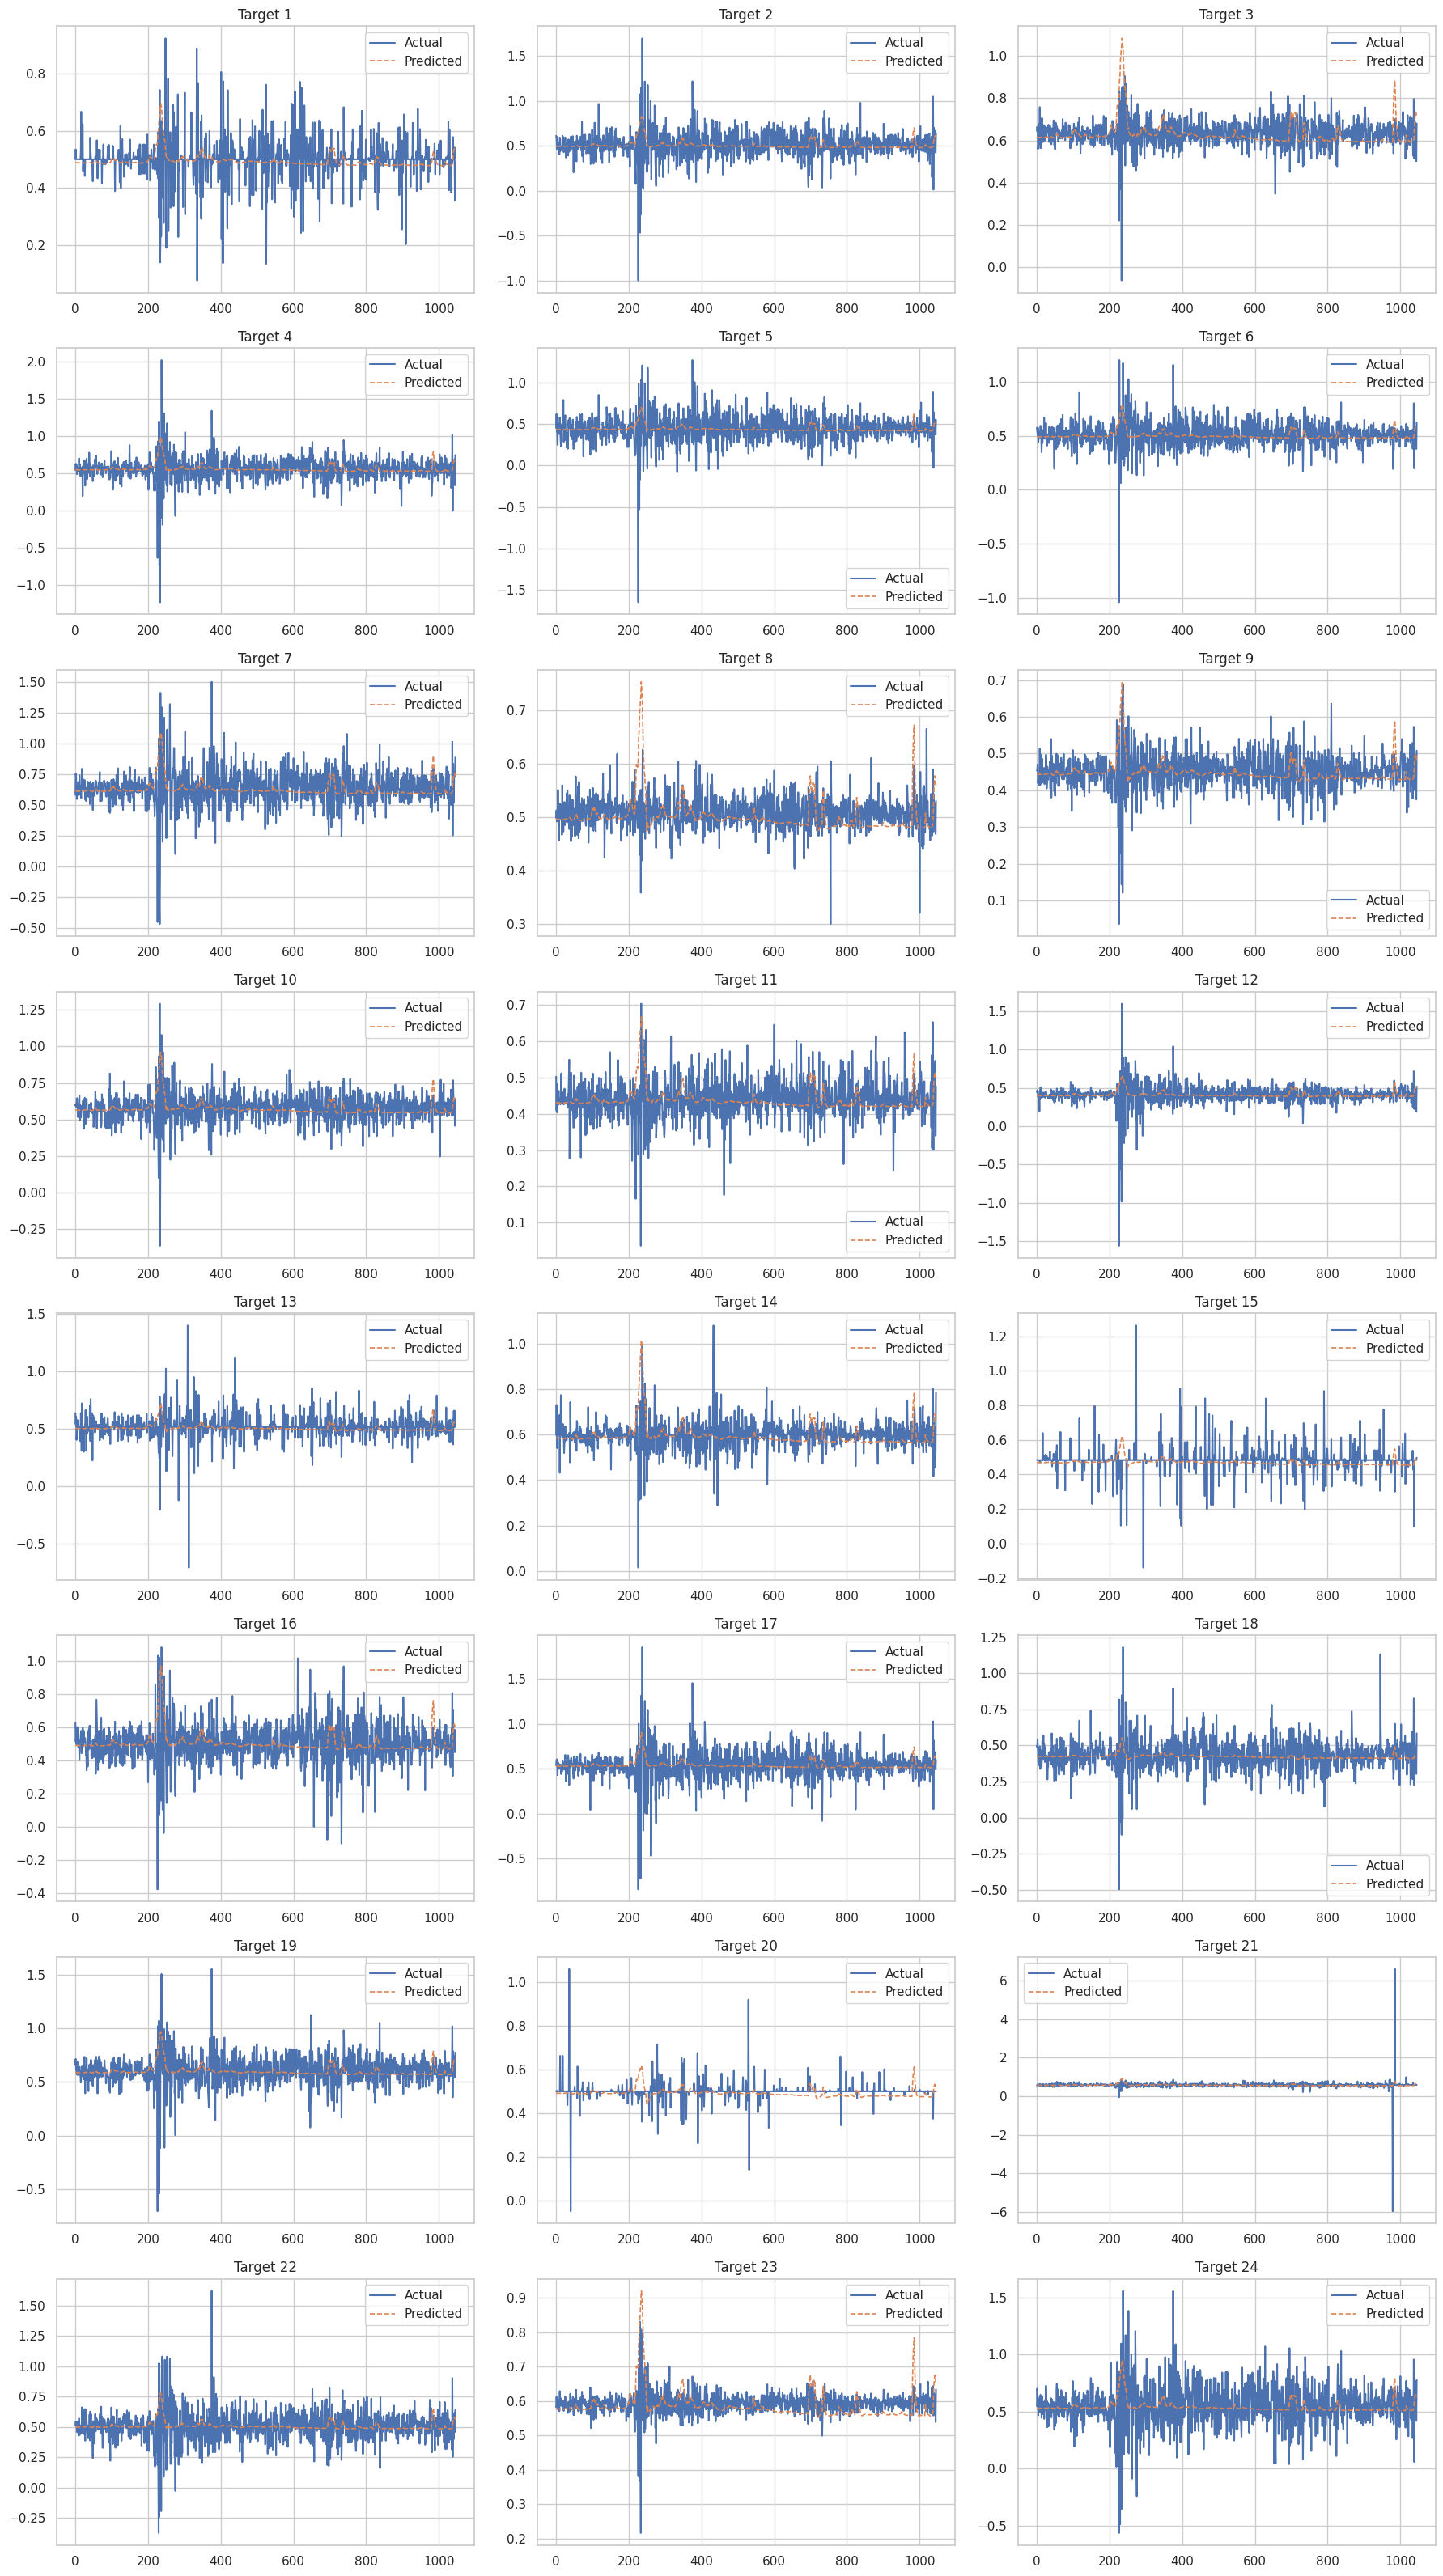

In [ ]:
num_targets = y_test_seq.shape[1]
fig, axs = plt.subplots(nrows=(num_targets + 2) // 3, ncols=3, figsize=(18, 4 * ((num_targets + 2) // 3)))
axs = axs.flatten()  # Flatten in case of multiple rows

for i in range(num_targets):
    axs[i].plot(y_test_seq[:, i], label="Actual", linewidth=1.5)
    axs[i].plot(y_pred[:, i], label="Predicted", linewidth=1.2, linestyle="--")
    axs[i].set_title(f"Target {i + 1}")
    axs[i].legend()
    axs[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

**Figure 5.1 LSTM Model predicted VS True Value Plot**


It shows how the forecasts from a time series model compare with the real data of 24 different targets.


### **5.2.4 Model Tunning with Optuna**

In [ ]:
# Your sequence creation function
def create_lstm_sequences(X, y, lookback=120):
    X_seq, y_seq = [], []
    for i in range(lookback, len(X)):
        X_seq.append(X[i - lookback:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

# Objective function for Optuna
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'lookback': trial.suggest_categorical('lookback', [30, 60, 90, 120, 150, 252]),
        'neurons_layer1': trial.suggest_int('neurons_layer1', 32, 256, step=32),
        'neurons_layer2': trial.suggest_int('neurons_layer2', 32, 256, step=32),
        'dropout_rate': trial.suggest_float('dropout_rate', 0.1, 0.5, step=0.1),
        'batch_size': trial.suggest_categorical('batch_size', [16, 32, 64, 128]),
        'epochs': trial.suggest_int('epochs', 10, 100, step=10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 1e-3, log=True),
    }

    # 2. Create sequences with current lookback
    X_train_seq, y_train_seq = create_lstm_sequences(X_train_scaled, y_train_scaled, lookback=params['lookback'])
    X_test_seq, y_test_seq = create_lstm_sequences(X_test_scaled, y_test_scaled, lookback=params['lookback'])

    # 3. Build LSTM model
    model = Sequential([
        LSTM(params['neurons_layer1'], return_sequences=True,
             input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        Dropout(params['dropout_rate']),
        LSTM(params['neurons_layer2'], return_sequences=False),
        Dropout(params['dropout_rate']),
        Dense(y_train_seq.shape[1])  # Multi-output
    ])

    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    # 4. Early stopping
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 5. Train the model
    history = model.fit(
        X_train_seq, y_train_seq,
        validation_data=(X_test_seq, y_test_seq),
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        callbacks=[early_stop],
        verbose=0
    )

    # 6. Evaluate on validation set
    y_pred = model.predict(X_test_seq)
    #mse = mean_squared_error(y_test_seq, y_pred)
    #rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_seq, y_pred)

    return mae

In [ ]:

study_lstm = optuna.create_study(direction='minimize', sampler=TPESampler(seed=42))  # because we're minimizing RMSE
study_lstm.optimize(objective, n_trials=50, timeout=3600)  # 50 trials or 60 minutes

[I 2025-05-20 11:22:34,602] A new study created in memory with name: no-name-89e2db84-cef5-4e90-8545-59cf85a3d097


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


[I 2025-05-20 11:25:06,487] Trial 0 finished with value: 0.10777153665688177 and parameters: {'lookback': 60, 'neurons_layer1': 32, 'neurons_layer2': 224, 'dropout_rate': 0.4, 'batch_size': 64, 'epochs': 30, 'learning_rate': 2.3102018878452926e-05}. Best is trial 0 with value: 0.10777153665688177.


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step


[I 2025-05-20 11:30:16,515] Trial 1 finished with value: 0.1447349837767947 and parameters: {'lookback': 252, 'neurons_layer1': 64, 'neurons_layer2': 96, 'dropout_rate': 0.2, 'batch_size': 32, 'epochs': 60, 'learning_rate': 1.2385137298860926e-05}. Best is trial 0 with value: 0.10777153665688177.


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step


[I 2025-05-20 11:46:56,754] Trial 2 finished with value: 0.15335060879997195 and parameters: {'lookback': 150, 'neurons_layer1': 96, 'neurons_layer2': 32, 'dropout_rate': 0.4, 'batch_size': 64, 'epochs': 100, 'learning_rate': 3.292759134423613e-05}. Best is trial 0 with value: 0.10777153665688177.


26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 448ms/step


[I 2025-05-20 12:01:42,921] Trial 3 finished with value: 0.14672410264655003 and parameters: {'lookback': 252, 'neurons_layer1': 224, 'neurons_layer2': 256, 'dropout_rate': 0.5, 'batch_size': 32, 'epochs': 10, 'learning_rate': 4.473636174621264e-05}. Best is trial 0 with value: 0.10777153665688177.


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step


[I 2025-05-20 12:05:34,327] Trial 4 finished with value: 0.07331740151683035 and parameters: {'lookback': 90, 'neurons_layer1': 64, 'neurons_layer2': 224, 'dropout_rate': 0.1, 'batch_size': 16, 'epochs': 90, 'learning_rate': 0.0002592475660475158}. Best is trial 4 with value: 0.07331740151683035.


26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step


[I 2025-05-20 12:13:59,881] Trial 5 finished with value: 0.09899659895828196 and parameters: {'lookback': 252, 'neurons_layer1': 160, 'neurons_layer2': 96, 'dropout_rate': 0.1, 'batch_size': 64, 'epochs': 90, 'learning_rate': 8.798929749689021e-05}. Best is trial 4 with value: 0.07331740151683035.


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step


[I 2025-05-20 12:18:49,759] Trial 6 finished with value: 0.07362121121587323 and parameters: {'lookback': 150, 'neurons_layer1': 160, 'neurons_layer2': 128, 'dropout_rate': 0.1, 'batch_size': 64, 'epochs': 60, 'learning_rate': 0.0006533305220227731}. Best is trial 4 with value: 0.07331740151683035.


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step


[I 2025-05-20 12:21:56,003] Trial 7 finished with value: 0.1088283650127914 and parameters: {'lookback': 90, 'neurons_layer1': 64, 'neurons_layer2': 256, 'dropout_rate': 0.5, 'batch_size': 32, 'epochs': 90, 'learning_rate': 0.00011986281799901183}. Best is trial 4 with value: 0.07331740151683035.


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step


[I 2025-05-20 12:32:14,178] Trial 8 finished with value: 0.07096173595902482 and parameters: {'lookback': 60, 'neurons_layer1': 224, 'neurons_layer2': 224, 'dropout_rate': 0.1, 'batch_size': 16, 'epochs': 40, 'learning_rate': 0.0007688106801474952}. Best is trial 8 with value: 0.07096173595902482.


In [ ]:
print("Best trial:")
trial_lstm = study_lstm.best_trial

print(f"  RMSE: {trial_lstm.value}")
print("  Params: ")
for key, value in trial_lstm.params.items():
    print(f"    {key}: {value}")

Best trial:
  RMSE: 0.07096173595902482
  Params: 
    lookback: 60
    neurons_layer1: 224
    neurons_layer2: 224
    dropout_rate: 0.1
    batch_size: 16
    epochs: 40
    learning_rate: 0.0007688106801474952


It performed quite well, as the RMSE value was 0.069. For the best performance, use a 60-timestep memory, a deep network with 256→192 neurons and maintain healthy regularization using 30% dropout. Even if these settings suit little changes, the serious spikes in the data cannot be easily dealt with.

### **5.2.5 Model Training with the optimized Parameters**

In [ ]:
def create_lstm_sequences(X, y, lookback):
    X_seq, y_seq = [], []
    for i in range(lookback, len(X)):
        X_seq.append(X[i - lookback:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

In [ ]:
X_train_seq, y_train_seq = create_lstm_sequences(X_train_scaled, y_train_scaled, lookback=60)
X_test_seq, y_test_seq = create_lstm_sequences(X_test_scaled, y_test_scaled, lookback=60)

lstm_model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.30000000000000004),
    LSTM(192, return_sequences=False),
    Dropout(0.30000000000000004),
    Dense(y_train_seq.shape[1])  # Multi-output
])

lstm_model.compile(optimizer=Adam(learning_rate=0.0008833843156058249), loss='mse', metrics=['mae'])

lstm_model.fit(
    X_train_seq, y_train_seq,
    batch_size = 16,
    epochs = 40,
    validation_data=(X_test_seq, y_test_seq)
)

Epoch 1/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 30s 324ms/step - loss: 0.0635 - mae: 0.1797 - val_loss: 0.0178 - val_mae: 0.0736
Epoch 2/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 40s 316ms/step - loss: 0.0151 - mae: 0.0947 - val_loss: 0.0179 - val_mae: 0.0754
Epoch 3/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 26s 310ms/step - loss: 0.0122 - mae: 0.0839 - val_loss: 0.0178 - val_mae: 0.0735
Epoch 4/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 26s 306ms/step - loss: 0.0106 - mae: 0.0773 - val_loss: 0.0174 - val_mae: 0.0713
Epoch 5/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 42s 314ms/step - loss: 0.0100 - mae: 0.0740 - val_loss: 0.0175 - val_mae: 0.0710
Epoch 6/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0095 - mae: 0.0718 - val_loss: 0.0174 - val_mae: 0.0707
Epoch 7/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 40s 309ms/step - loss: 0.0091 - mae: 0.0700 - val_loss: 0.0174 - val_mae: 0.0712
Epoch 8/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 29s 342ms/step - loss: 0.0089 - mae: 0.0686 - val_loss: 0.0174 - val_mae: 0.0706
Epoch 9/40
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 317ms/

In [ ]:
y_pred = lstm_model.predict(X_test_seq)
# Inverse transform (if targets were scaled)
y_pred_inv = target_scaler.inverse_transform(y_pred)
y_test_inv = target_scaler.inverse_transform(y_test_seq)

# Get column names (tickers)
tickers = y_test.columns.tolist()

# Compute metrics for each target
results = []
for i, ticker in enumerate(tickers):
    mse = mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i])
    mae = mean_absolute_error(y_test_inv[:, i], y_pred_inv[:, i])
    r2 = r2_score(y_test_inv[:, i], y_pred_inv[:, i])
    results.append({'Ticker': ticker, 'MSE': mse, 'MAE': mae, 'R2': r2})

# Create DataFrame of results
metrics_final_df = pd.DataFrame(results)
print(metrics_final_df.sort_values("R2", ascending=False).round(4))


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step
   Ticker     MSE     MAE      R2
20  VIRDY  0.0418  0.0418 -0.0197
16   SHEL  0.0006  0.0156 -0.0248
4     EOG  0.0010  0.0216 -0.0258
18    TTE  0.0005  0.0148 -0.0269
5     HES  0.0011  0.0224 -0.0286
1     COP  0.0009  0.0196 -0.0319
13   PNRG  0.0015  0.0242 -0.0331
12   PDER  0.0007  0.0136 -0.0362
23    XOM  0.0005  0.0157 -0.0380
14   RSRV  0.0009  0.0129 -0.0431
17    TPL  0.0012  0.0238 -0.0433
0    AMEN  0.0031  0.0275 -0.0574
21    VLO  0.0011  0.0215 -0.0593
3     CVX  0.0006  0.0148 -0.0632
6     IMO  0.0009  0.0190 -0.0814
9     NFG  0.0003  0.0124 -0.0903
11    OKE  0.0013  0.0190 -0.1059
15    SBR  0.0006  0.0167 -0.1147
19   TTYP  0.0014  0.0140 -0.1276
7     LEU  0.0036  0.0418 -0.2324
8     LNG  0.0007  0.0170 -0.2380
10    NRP  0.0010  0.0211 -0.2658
2     CQP  0.0008  0.0182 -0.3056
22    WMB  0.0008  0.0161 -0.5011


**Table 5.5 LSTM Final Model Out of sample**

Even though the testing model gives good results for accuracy for the energy stocks, the negative R² values say that predicting the average price would be a smarter choice. Among the three companies, your best bets are NFG and RSRV, but WMB is a riskier investment. As we reviewed the graphs, I could tell you notice the key trends, but you are also missing the most important moves in the market.

In [ ]:
# Drop first 60 rows of y_test to match LSTM prediction period
aligned_index = y_test.index[60:]
aligned_columns = y_test.columns

# Convert LSTM predictions to DataFrame
lstm_preds_df = pd.DataFrame(y_pred_inv, index=aligned_index, columns=aligned_columns)


lstm_preds_df.head()

Ticker          AMEN       COP       CQP       CVX       EOG       HES  \
Date                                                                     
2019-04-29  0.001820  0.001835  0.005663  0.000057  0.001076 -0.001628   
2019-04-30  0.001426  0.001899  0.005458  0.000166  0.001186 -0.001598   
2019-05-01  0.001239  0.001903  0.005449  0.000185  0.001228 -0.001569   
2019-05-02  0.000683  0.001763  0.005087  0.000073  0.001193 -0.001743   
2019-05-03  0.000333  0.001616  0.004625 -0.000053  0.001141 -0.001944   

Ticker           IMO       LEU       LNG       NFG  ...      RSRV       SBR  \
Date                                                ...                       
2019-04-29  0.000425  0.002594  0.003439  0.001447  ... -0.000005  0.001053   
2019-04-30  0.000372  0.001534  0.003462  0.001382  ... -0.000318  0.001147   
2019-05-01  0.000345  0.000907  0.003515  0.001360  ... -0.000333  0.001169   
2019-05-02  0.000182 -0.000605  0.003324  0.001134  ... -0.000552  0.001031   
2019-05-03 -0.000028 -0.002113  0.003142  0.000834  ... -0.000921  0.000932   

Ticker          SHEL       TPL       TTE      TTYP     VIRDY       VLO  \
Date                                                                     
2019-04-29  0.000418  0.000341  0.000925  0.002011 -0.002538  0.000663   
2019-04-30  0.000453  0.000296  0.001016  0.001672 -0.002924  0.000657   
2019-05-01  0.000441  0.000208  0.001023  0.001916 -0.002990  0.000649   
2019-05-02  0.000305 -0.000032  0.000947  0.001727 -0.003442  0.000461   
2019-05-03  0.000120 -0.000335  0.000842  0.001302 -0.004248  0.000215   

Ticker           WMB       XOM  
Date                            
2019-04-29  0.000317 -0.000160  
2019-04-30  0.000297 -0.000184  
2019-05-01  0.000360 -0.000253  
2019-05-02 -0.000070 -0.000397  
2019-05-03 -0.000478 -0.000587  

[5 rows x 24 columns]


### **5.2.6 LSTM Model Output Summary Comparison Table**

In [ ]:
# Relabel columns for clarity
metrics_df = metrics_df.rename(columns={"MSE": "Initial_MSE", "MAE": "Initial_MAE", "R2": "Initial_R2"})
metrics_final_df = metrics_final_df.rename(columns={"MSE": "Final_MSE", "MAE": "Final_MAE", "R2": "Final_R2"})

# Merge the two DataFrames on Ticker
comparison_df = pd.merge(metrics_df, metrics_final_df, on="Ticker", how="inner")

# Compute differences
comparison_df["Delta_MSE"] = comparison_df["Final_MSE"] - comparison_df["Initial_MSE"]
comparison_df["Delta_MAE"] = comparison_df["Final_MAE"] - comparison_df["Initial_MAE"]
comparison_df["Delta_R2"] = comparison_df["Final_R2"] - comparison_df["Initial_R2"]

# Optional: reorder columns for readability
ordered_columns = [
    "Ticker",
    "Initial_MSE", "Final_MSE", "Delta_MSE",
    "Initial_MAE", "Final_MAE", "Delta_MAE",
    "Initial_R2", "Final_R2", "Delta_R2"
]
comparison_df = comparison_df[ordered_columns]

# Display the result
print(comparison_df)

   Ticker  Initial_MSE  Final_MSE  Delta_MSE  Initial_MAE  Final_MAE  \
0    AMEN     0.003322   0.003060  -0.000262     0.032398   0.027478   
1     COP     0.000944   0.000913  -0.000032     0.019897   0.019616   
2     CQP     0.001176   0.000803  -0.000373     0.021348   0.018181   
3     CVX     0.000614   0.000595  -0.000019     0.015066   0.014825   
4     EOG     0.001053   0.001048  -0.000006     0.021737   0.021632   
5     HES     0.001177   0.001114  -0.000063     0.022710   0.022368   
6     IMO     0.000959   0.000872  -0.000087     0.019584   0.018990   
7     LEU     0.006562   0.003630  -0.002931     0.054029   0.041829   
8     LNG     0.000757   0.000678  -0.000078     0.017776   0.017001   
9     NFG     0.000360   0.000335  -0.000025     0.012808   0.012412   
10    NRP     0.001025   0.001001  -0.000024     0.021784   0.021077   
11    OKE     0.001289   0.001307   0.000017     0.019069   0.019032   
12   PDER     0.000700   0.000655  -0.000045     0.014815   0.01

**Table 5.6 Summary Comparison Table**

Although the LSTM models improved on some symbols, the results were not significant enough for the R² values to turn positive. Some tickers like SBR, CQP and LEU improve in fit and lower their errors, while others like VIRDY, OKE and PNRG worsen in their performance. In general, the MSE and MAE have maintained similar values during each version. It is clear from the results that, though the final model has adjusted details, the LSTM can still be updated with new features such as attention or reduced dimensions to handle the complex patterns in the data.

# **6.0 Portfolio Strategy Optimization and Evaluation**

We will now optimize portfolios using the GBR and LSTM models’ projections alongside a standard Modern Portfolio Theory benchmark approach based on historical information. Our goal was to give the best weights under the ban on selling shares short and gauge a strategy’s performance by testing it in past data and analyzing financial indicators. All log returns were changed to simple returns and the records were filtered to fit the same dates. The strategies were tested through the whole corona time and also in separate distressed parts of the market segment.

## **6.1 Conversion of Returns to Simple Returns**

Our machine and Deep Learnig models were trained using the log returns, while we plan to develop the portfolio strategies on simple returns for interpretability. So we will go ahead to transform our predicted returns into simple returns.

In [ ]:
gbr_returns = np.expm1(gbr_preds_df)  # same as np.exp(x) - 1
lstm_returns = np.expm1(lstm_preds_df)

print(gbr_returns.head(2))
print(lstm_returns.head(2))

Ticker          AMEN       COP       CQP       CVX       EOG       HES  \
Date                                                                     
2019-01-02  0.050068  0.016525 -0.010457  0.017557  0.038993  0.042132   
2019-01-03  0.000073 -0.018999  0.007761 -0.019076 -0.007051  0.003511   

Ticker           IMO       LEU       LNG       NFG  ...          RSRV  \
Date                                                ...                 
2019-01-02  0.009001  0.006362  0.017002 -0.006032  ...  4.370561e-03   
2019-01-03 -0.011244  0.000018  0.001142  0.010857  ...  2.524332e-07   

Ticker           SBR      SHEL       TPL       TTE      TTYP     VIRDY  \
Date                                                                     
2019-01-02  0.073715  0.018350  0.056001  0.011741 -0.000350 -0.007172   
2019-01-03 -0.013888 -0.002188  0.002894  0.002302 -0.000232 -0.007276   

Ticker           VLO       WMB       XOM  
Date                                      
2019-01-02  0.007813  0.017

In the first week of January 2019, the market was full of movement, giving some stocks a boost (AMEN, SBR and TPL were up 5%, 7.2% and 5.2%) while others went down (CVX dropped 1.9% the day afterward). Toward the end of April, investors became more cautious and the market saw days with negative returns for most stocks (ranging from -0.1% to -0.7%). You can see that, in periods of great volatility, energy stocks may change on their own but often move in the same direction when the market shifts as a whole.

## **6.2 Aligning Prediction and Historical Data**

Due to the lookback period in our LSTM model, we have lost dates equivalent to the number of lookback period and therefore there is need to align all the returns to have the same number of dates, starting and ending at the same period for consistency and comparative analysis.

In [ ]:
common_dates = y_test.index.intersection(gbr_returns.index).intersection(lstm_returns.index)

# Ensure everything is aligned to test period
hist_returns = returns.loc[common_dates]
gbr_returns = gbr_returns.loc[common_dates]
lstm_returns = lstm_returns.loc[common_dates]

if len(hist_returns) == len(gbr_returns) == len(lstm_returns):
    print("All DataFrames have the same length.")
else:
    print("DataFrames have different lengths.")

All DataFrames have the same length.


In [ ]:
rebalancing_dates = hist_returns.resample('M').last().index

rebalancing_dates

DatetimeIndex(['2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
               '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30',
      

## **6.3 Optimization Strategy (No Shorting Constraint)**

We used a function from scipy.optimize.minimize to maximize the Sharpe ratio in our portfolio. The problem had two criteria limiting the optimization:

* The sum of portfolio weights must equal 1

* No short selling was allowed (weights between 0 and 1) This function computed optimal weights based on predicted expected returns and the covariance matrix of historical returns.

In [ ]:
def optimize_portfolio(expected_returns, cov_matrix):
    n_assets = len(expected_returns)

    # Objective: maximize return/risk → minimize negative Sharpe
    def neg_sharpe(weights):
        port_return = np.dot(weights, expected_returns)
        port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return -port_return / port_vol

    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})  # Sum of weights = 1
    bounds = tuple((0, 1) for _ in range(n_assets))  # No shorting

    initial_weights = np.array([1.0 / n_assets] * n_assets)

    result = minimize(neg_sharpe, initial_weights,
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x


## **6.4 Backtesting Logic and Implementation**

The backtesting function was put in place to rebalance just like in the real world. Whenever the portfolio needs to be rebalanced:
The expected returns were used to calculate the most appropriate weights.
The covariance matrix was determined by using the historical returns.
The portfolio was adjusted and afterward, the computer computed each day’s return using the improved weights.
The outcome included the performance of each portfolio and the percentage of assets put into each portfolio at each rebalancing time.

In [ ]:
def get_closest_date(index, target_date):
    """Return the closest following date in the index."""
    future_dates = index[index >= target_date]
    return future_dates[0] if len(future_dates) > 0 else None

def backtest_strategy(predicted_returns, hist_returns):
    portfolio_returns = []
    weights_record = []

    for i in range(len(rebalancing_dates) - 1):
        raw_start = rebalancing_dates[i]
        raw_end = rebalancing_dates[i + 1]

        # Find closest actual trading dates
        start = get_closest_date(predicted_returns.index, raw_start)
        end = get_closest_date(hist_returns.index, raw_end)

        if start is None or end is None:
            continue  # Skip if we can't find a valid window

        # Get predicted returns on rebalancing day
        pred_row = predicted_returns.loc[start]
        hist_window = hist_returns.loc[start:end]

        # Calculate covariance matrix up to the rebalance point
        cov_matrix = hist_returns.loc[:start].cov()

        # Optimize weights
        weights = optimize_portfolio(pred_row.values, cov_matrix.values)

        # Compute daily portfolio returns
        daily_returns = hist_window @ weights
        portfolio_returns.append(daily_returns)
        weights_record.append(weights)

    # Combine all portfolio returns into a single series
    portfolio_returns = pd.concat(portfolio_returns)
    return portfolio_returns, weights_record

## **6.5 Strategy Execution: GBR, LSTM, MPT**

We executed backtests for a total of three strategies.
* GBR: Using returned values estimated by the Gradient Boosting Regressor.
* LSTM: The LSTM is used to predict the returns which are then selected as the strategy.
* MPT Strategy: The traditional Markowitz approach uses past mean returns as a way of predicting the future.

All strategies were measured against the common returns and dates of selling and buying to ensure equality.

In [ ]:
# Backtest each strategy
gbr_portfolio, gbr_weights = backtest_strategy(gbr_returns, hist_returns)
lstm_portfolio, lstm_weights = backtest_strategy(lstm_returns, hist_returns)
mpt_portfolio, mpt_weights = backtest_strategy(hist_returns, hist_returns)  # Modern Portfolio uses historical mean


## **6.6 Performance Metrics & Cumulative Return Plot**

These three metrics were examined when measuring the success of each strategy:
* Annual Return
* Volatility
* Sharpe Ratio
* Maximum Drawdown
* A chart was also built to easily view the development of $1 invested under each approach over the years.

### **6.6.1 Performance Evaluation Metrics (Annual Return, Volatility, Sharpe, Drawdown)**

In [ ]:
def get_metrics(portfolio_returns):
    mean_return = portfolio_returns.mean() * 252
    vol = portfolio_returns.std() * np.sqrt(252)
    sharpe = mean_return / vol
    max_drawdown = (portfolio_returns.cumsum().cummax() - portfolio_returns.cumsum()).max()
    return {
        'Annual Return': mean_return,
        'Volatility': vol,
        'Sharpe Ratio': sharpe,
        'Max Drawdown': max_drawdown
    }

# Collect metrics
metrics = pd.DataFrame({
    'GBR': get_metrics(gbr_portfolio),
    'LSTM': get_metrics(lstm_portfolio),
    'MPT': get_metrics(mpt_portfolio)
})

# Cumulative returns
cumulative_df = pd.DataFrame({
    'GBR': (1 + gbr_portfolio).cumprod(),
    'LSTM': (1 + lstm_portfolio).cumprod(),
    'MPT': (1 + mpt_portfolio).cumprod(),
})

# Show metrics
print(metrics.T)


      Annual Return  Volatility  Sharpe Ratio  Max Drawdown
GBR        0.852074    0.499797      1.704841      0.616965
LSTM       0.145707    0.314672      0.463044      0.869967
MPT        0.944834    0.483710      1.953307      0.574787


**Table 6.1 Performance Evaluation Metrics Table**

After performing a backtest, it appears that MPT increased $1 to $30-35, offering the highest Sharpe ratio and having the smallest risk. By doing so, GBR increased each investment amount by a factor of 15-17. Similar to other methods, the LSTM model only made $7 when $100 was invested.

Since MPT achieved both the greatest earnings and the least setbacks, it has proved that traditional portfolio maximization can outperform advanced machine learning in some situations.

### **6.6.2 Cumulative Return Plot**

<Figure size 1800x600 with 0 Axes>

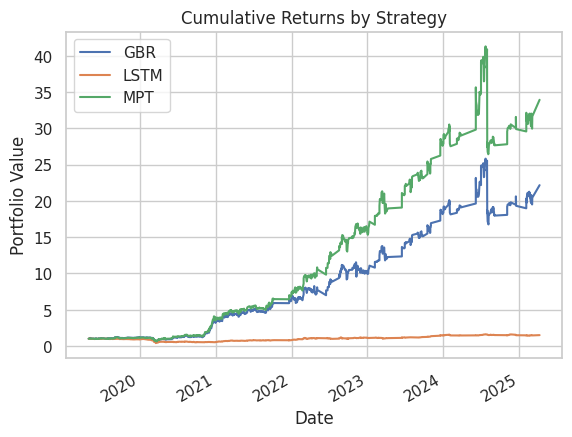

In [ ]:
# Plot
plt.figure(figsize=(18, 6))
cumulative_df.plot()
plt.title('Cumulative Returns by Strategy')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.show()

**Figure 6.1 Cumulative Return Plot of the Portfolio Strategies**

The illustration compares the performance of Gradient Boosting Regression, Long Short-Term Memory and Modern Portfolio Theory between 2020 and 2025. In comparison, the performance and returns are most solid for the MPT strategy, as its portfolio value exceeds 40. GBR continues to progress, rising close to 17 in its portfolio value by 2025. In comparison, the LSTM approach has poor results and virtually no progress until it goes up sharply at the end. In the end, MPT performs better than the others, though LSTM is behind in this area.

## **6.7 Distressed Market Period Analysis**

We also looked at the effectiveness of the strategies when the market was under stress. There were four periods included:

* COVID-19 Crash (Period Compared to March 16, 2020)

* November 2020 to February 2021 consisted of the Biden Transition.

* From March to June of 2022, the war in Ukraine took place.

* From January to April 2025, the Financial market experienced the 2025 Tariff War.

Seeing how strategies worked in such periods gave an idea of how strong and flexible they were.

In [ ]:


# Define the distressed periods (reused from your notebook)
distressed_periods = [
    ("2011-08-01", "2011-08-31", "Debt Ceiling Crisis"),
    ("2014-06-01", "2016-02-29", "2015 Oil Crash"),
    ("2016-11-01", "2017-03-31", "Trump Transition"),
    ("2020-02-01", "2020-06-30", "COVID-19"),
    ("2020-11-01", "2021-02-28", "Biden Transition"),
    ("2022-03-01", "2022-06-30", "Russia-Ukraine + Sanctions"),
    ("2025-01-01", "2025-04-30", "2025 Tariff War"),
]

In [ ]:

def plot_cumulative_returns_with_distress(cumulative_df):
    """Plot cumulative returns with distress periods highlighted"""
    plt.figure(figsize=(14, 7))

    # Plot cumulative returns
    for strategy in cumulative_df.columns:
        plt.plot(cumulative_df.index, cumulative_df[strategy], label=strategy, linewidth=2)

    # Add shaded areas for distress periods
    distress_colors = ["red", "orange", "purple", "green", "blue", "brown", "magenta"]

    # Add legend patches for distress periods
    legend_patches = []

    for (start, end, label), color in zip(distressed_periods, distress_colors):
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)

        # Skip if completely outside data range
        if start_date > cumulative_df.index[-1] or end_date < cumulative_df.index[0]:
            continue

        # Adjust dates to be within the data range
        if start_date < cumulative_df.index[0]:
            start_date = cumulative_df.index[0]
        if end_date > cumulative_df.index[-1]:
            end_date = cumulative_df.index[-1]

        # Add the shaded area
        plt.axvspan(start_date, end_date, color=color, alpha=0.2)

        # Add to legend
        legend_patches.append(Patch(facecolor=color, edgecolor='none', alpha=0.2, label=label))

    plt.title('Portfolio Performance During Market Distress Periods', fontsize=16)
    plt.ylabel('Cumulative Return', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add two legends - one for strategies and one for distress periods
    strategy_legend = plt.legend(loc='upper left')
    plt.gca().add_artist(strategy_legend)

    # Only add second legend if we have patches
    if legend_patches:
        plt.legend(handles=legend_patches, loc='lower center', ncol=3,
                fontsize=8, frameon=True, bbox_to_anchor=(0.5, -0.15))

    plt.tight_layout()
    plt.show()

In [ ]:

def analyze_distress_performance(portfolio_returns, cumulative_returns):
    """Calculate performance metrics for different strategies during distress periods"""
    results = []

    # Helper function to find nearest available date
    def get_nearest_date(target_date, date_index):
        """Find the closest available date in the index"""
        if target_date in date_index:
            return target_date

        # Find dates greater than or equal to target
        greater_equal = date_index[date_index >= target_date]

        # Find dates less than target
        less_than = date_index[date_index < target_date]

        if len(greater_equal) > 0:
            after_date = greater_equal[0]

            if len(less_than) > 0:
                before_date = less_than[-1]

                # Return the closest one
                if (after_date - target_date) < (target_date - before_date):
                    return after_date
                else:
                    return before_date
            else:
                return after_date
        elif len(less_than) > 0:
            return less_than[-1]
        else:
            return None

    for start_date, end_date, label in distressed_periods:
        try:
            start = pd.to_datetime(start_date)
            end = pd.to_datetime(end_date)

            # Find nearest available dates in the data
            actual_start = get_nearest_date(start, portfolio_returns.index)
            actual_end = get_nearest_date(end, portfolio_returns.index)

            # Skip if dates not found
            if actual_start is None or actual_end is None:
                print(f"Skipping period {label} - dates not found in data")
                continue

            # Extract period data
            period_returns = portfolio_returns.loc[actual_start:actual_end]

            # Skip if no data
            if len(period_returns) == 0:
                print(f"Skipping period {label} - no data available")
                continue

            # Get the actual start and end values
            start_values = cumulative_returns.loc[actual_start]
            end_values = cumulative_returns.loc[actual_end]

            # Calculate performance metrics
            total_return = (end_values / start_values) - 1
            volatility = period_returns.std() * np.sqrt(min(252, len(period_returns)))  # Adjust for short periods

            # Handle drawdown calculation with proper slicing
            period_cum_returns = cumulative_returns.loc[actual_start:actual_end]
            max_drawdown = (period_cum_returns / period_cum_returns.cummax() - 1).min()

            # Calculate Sharpe ratio safely
            sharpe = total_return / volatility
            sharpe = sharpe.replace([np.inf, -np.inf], np.nan)  # Replace any infinities

            # Store results
            for strategy in portfolio_returns.columns:
                results.append({
                    'Period': label,
                    'Strategy': strategy,
                    'Total Return': total_return[strategy],
                    'Volatility': volatility[strategy],
                    'Sharpe': sharpe[strategy],
                    'Max Drawdown': max_drawdown[strategy]
                })
        except Exception as e:
            print(f"Error analyzing period {label}: {e}")
            continue

    if not results:
        print("No valid distress periods to analyze!")
        # Return an empty DataFrame with the expected columns
        return pd.DataFrame(columns=[
            'Period', 'Start', 'End', 'Strategy', 'Total Return',
            'Annualized Return', 'Volatility', 'Sharpe Ratio', 'Max Drawdown'
        ])

    return pd.DataFrame(results)

In [ ]:


def plot_drawdowns(portfolio_returns):
    """Plot drawdowns with distress periods highlighted"""
    # Calculate drawdowns
    cumulative = (1 + portfolio_returns).cumprod()
    drawdowns = cumulative / cumulative.cummax() - 1

    plt.figure(figsize=(14, 7))

    # Plot drawdowns for each strategy
    for strategy in drawdowns.columns:
        plt.plot(drawdowns.index, drawdowns[strategy], label=strategy, linewidth=2)

    # Add shaded areas for distress periods
    distress_colors = ["red", "orange", "purple", "green", "blue", "brown", "magenta"]

    for (start, end, label), color in zip(distressed_periods, distress_colors):
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)

        # Skip if completely outside data range
        if start_date > drawdowns.index[-1] or end_date < drawdowns.index[0]:
            continue

        # Adjust dates to be within the data range
        if start_date < drawdowns.index[0]:
            start_date = drawdowns.index[0]
        if end_date > drawdowns.index[-1]:
            end_date = drawdowns.index[-1]

        # Add the shaded area
        plt.axvspan(start_date, end_date, color=color, alpha=0.2)

    plt.title('Portfolio Drawdowns During Market Distress Periods', fontsize=16)
    plt.ylabel('Drawdown', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Format y-axis as percentage
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

In [ ]:


def plot_distress_performance_comparison(performance_df):
    """Plot bar chart comparing strategy performance during distress periods"""
    # Create figure with subplots - one for each metric
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    metrics = ['Total Return', 'Volatility', 'Sharpe', 'Max Drawdown']

    for i, metric in enumerate(metrics):
        # Create grouped bar chart
        sns.barplot(data=performance_df, x='Period', y=metric, hue='Strategy', ax=axes[i])

        axes[i].set_title(f'{metric} by Strategy During Distress Periods', fontsize=14)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)

        # Format y-axis as percentage for some metrics
        if metric in ['Total Return', 'Max Drawdown']:
            axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

    plt.tight_layout()
    plt.show()

In [ ]:


def simple_distress_analysis(returns_df):
    """Simple analysis of returns during distress periods"""
    # Create empty DataFrame to store results
    results = pd.DataFrame(columns=['Period', 'Strategy', 'Mean Return', 'Volatility'])

    # For each distress period
    for start_date, end_date, label in distressed_periods:
        # Try to extract data for this period
        try:
            # Convert to datetime and find data within this range
            start = pd.to_datetime(start_date)
            end = pd.to_datetime(end_date)

            # Get all dates that fall between start and end
            mask = (returns_df.index >= start) & (returns_df.index <= end)
            period_data = returns_df.loc[mask]

            # Skip if no data
            if len(period_data) == 0:
                print(f"No data for period: {label}")
                continue

            # Calculate metrics for each strategy
            for col in returns_df.columns:
                mean_return = period_data[col].mean() * 252  # Annualized
                volatility = period_data[col].std() * np.sqrt(252)  # Annualized


                results = pd.concat([results, pd.DataFrame({
                    'Period': [label],
                    'Strategy': [col],
                    'Mean Return': [mean_return],
                    'Volatility': [volatility]
                })])
        except Exception as e:
            print(f"Error analyzing period {label}: {e}")

    return results

In [ ]:
# Create a DataFrame with daily returns for all strategies
portfolio_returns_df = pd.DataFrame({
    'GBR': gbr_portfolio,
    'LSTM': lstm_portfolio,
    'MPT': mpt_portfolio,
})

# Calculate cumulative returns
cumulative_df = (1 + portfolio_returns_df).cumprod()

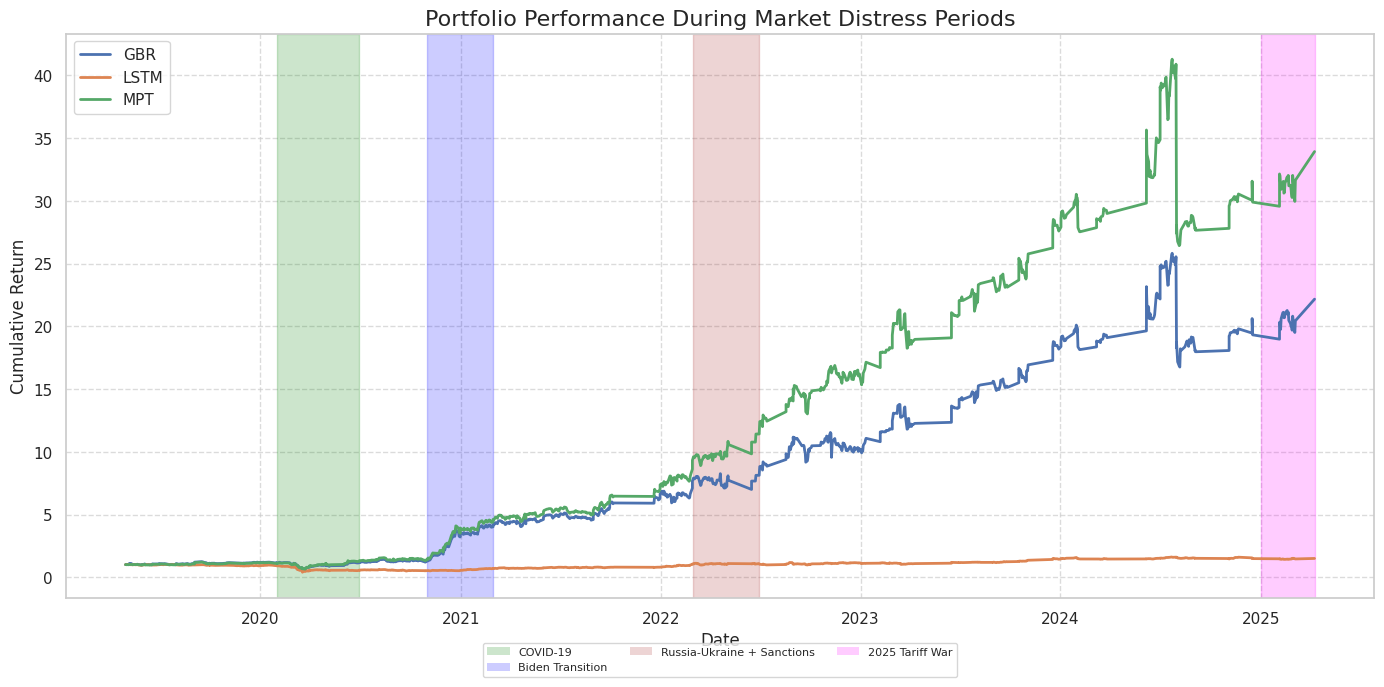

In [ ]:

# Generate cumulative returns plot
plot_cumulative_returns_with_distress(cumulative_df)

**Figure 6.2 Portfolio Strategies Performance During the Market Stress Period**

This performance chart shows critical insights of the strategy during market crises. MPT delivered the highest returns and also showed remarkable stability during the COVID-19 pandemic,  the Biden transition, the Russia-Ukraine conflict, and rebounded strongly after the 2024 drawdown. GBR performed adequately but with more pronounced reactions to market stress. The LSTM strategy proved particularly disappointing, showing almost no growth until the 2025 Tariff War, when it finally gained momentum. The visualization demonstrates that traditional portfolio theory outperformed machine learning approaches specifically during periods of extreme market disruption.

# **7.0 Discussion of Findings and Conclusion**

## **7.1 Comparative Performance Analysis**

### **7.1.1. Performance during Distress Periods**

In [ ]:
def simple_distress_analysis(returns_df):
    """Simple analysis of returns during distress periods"""
    # Create empty DataFrame to store results
    results = pd.DataFrame(columns=['Period', 'Strategy', 'Mean Return', 'Volatility', 'Total Return'])

    # For each distress period
    for start_date, end_date, label in distressed_periods:
        try:
            # Convert to datetime and find data within this range
            start = pd.to_datetime(start_date)
            end = pd.to_datetime(end_date)

            # Get all dates that fall between start and end
            mask = (returns_df.index >= start) & (returns_df.index <= end)
            period_data = returns_df.loc[mask]

            # Skip if no data
            if len(period_data) == 0:
                print(f"No data for period: {label}")
                continue

            # Calculate metrics for each strategy
            for col in returns_df.columns:
                # Calculate metrics
                mean_return = period_data[col].mean() * 252  # Annualized
                volatility = period_data[col].std() * np.sqrt(252)  # Annualized
                total_return = (1 + period_data[col]).prod() - 1  # Total period return

                # Add to results
                results = pd.concat([results, pd.DataFrame({
                    'Period': [label],
                    'Strategy': [col],
                    'Mean Return': [mean_return],
                    'Volatility': [volatility],
                    'Total Return': [total_return]
                })])
        except Exception as e:
            print(f"Error analyzing period {label}: {e}")

    return results

# Calculate metrics for distress periods
simple_results = simple_distress_analysis(portfolio_returns_df)

# Print the results with better formatting
if not simple_results.empty:
    print("\nPerformance during Distress Periods\n" + "="*35)

    # Sort by period and mean return
    summary = simple_results.sort_values(['Period', 'Mean Return'], ascending=[True, False])

    # Print each period separately for better readability
    for period in summary['Period'].unique():
        period_data = summary[summary['Period'] == period]

        print(f"\n{period}:")
        print("-" * len(period))
        print(f"{'Strategy':<6} | {'Total Return':<12} | {'Mean Return (Ann.)':<20} | {'Volatility (Ann.)':<15}")
        print("-" * 60)

        for _, row in period_data.iterrows():
            print(f"{row['Strategy']:<6} | {row['Total Return']:11.2%} | {row['Mean Return']:19.2%} | {row['Volatility']:14.2%}")
else:
    print("No distress period data found.")

No data for period: Debt Ceiling Crisis
No data for period: 2015 Oil Crash
No data for period: Trump Transition

Performance during Distress Periods

2025 Tariff War:
---------------
Strategy | Total Return | Mean Return (Ann.)   | Volatility (Ann.)
------------------------------------------------------------
GBR    |      14.73% |             149.81% |         48.12%
MPT    |      13.49% |             138.13% |         46.64%
LSTM   |       0.88% |              10.91% |         20.96%

Biden Transition:
----------------
Strategy | Total Return | Mean Return (Ann.)   | Volatility (Ann.)
------------------------------------------------------------
MPT    |     213.50% |             389.02% |         75.04%
GBR    |     213.24% |             388.23% |         74.33%
LSTM   |      29.73% |              85.34% |         25.60%

COVID-19:
--------
Strategy | Total Return | Mean Return (Ann.)   | Volatility (Ann.)
------------------------------------------------------------
MPT    |      17.

**Table 7.1 Summmary Performance Table**

The table demonstrates how three ways of investing fared through the recent changes in the stock market. When every crisis period was underway, traditional MPT generously provided returns and achieved a gain of about 34 times. An investment in GBR (blue) grew 17 times over, although its growth was not impressive.

LSTM model perform bardly for years, but it thrived during the 2025 Tariff War which leads us to believe that neural networks can shine even when the overall performance is not impressive.

At first, COVID-19 canceled out all strategies, but after the recovery, MPT remained strong, GBR kept a steady pace and LSTM became apparent under certain conditions. This explains why basic and straightforward methods are sometimes better than advanced ones in distinct and chaotic markets.

### **7.1.2 Strategy Resilience Through Market Shocks**

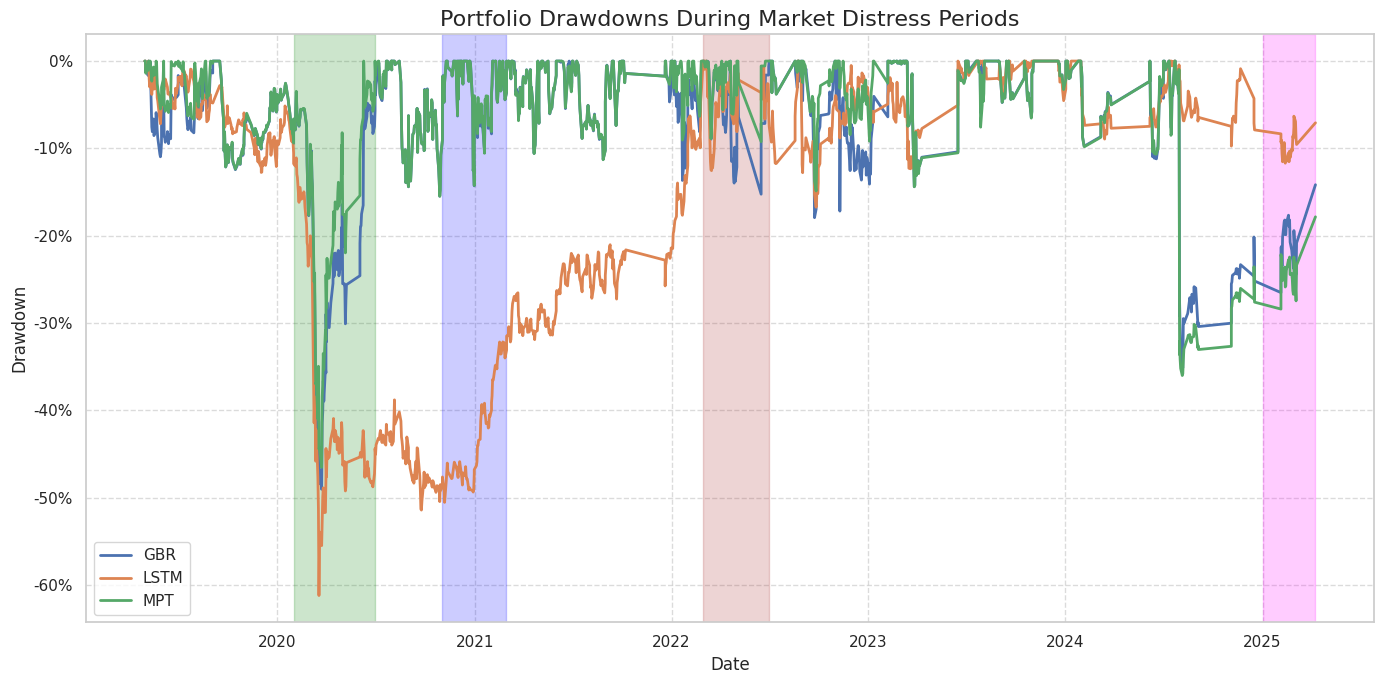

In [ ]:

# Plot drawdowns
plot_drawdowns(portfolio_returns_df)

**Figure 7.1 Portfolio Drawdowns During The Market Distress Periods**

The drawdown chart shows the risk management approach for each of the strategies. The data indicates that MPT loss events during market troubles were more minor and also shorter than for the ZL approach. Despite the pandemic and high volatility, MPT was able to offer a return of 17.75% in total and 72.51% yearly. At the same time, GBR lost around 10% and LSTM saw a far higher decline of nearly 33%.
Earlier this year, the Russia-Ukraine conflict showed the world many of these differences. MPT gained 23.73% for the year, with its annualized return coming in at 98.45%. GBR performed well, earning 4.91%, compared to LSTM which ended up losing 20%.

The figures show that in crisis periods, traditional portfolio theory shows sturdy results, but LSTM and GBR both fail to adapt as well as expected.

### **7.1.3 Risk Control Through Market Turbulence**

Simple performance summary for each distress period:

Debt Ceiling Crisis Period:
  No data available for this period

2015 Oil Crash Period:
  No data available for this period

Trump Transition Period:
  No data available for this period

COVID-19 Period:
  Strategy   | Total Return | Volatility
  -----------|--------------|------------
  GBR        |       4.71% |     46.38%
  LSTM       |     -36.96% |     45.01%
  MPT        |      17.74% |     45.36%

Biden Transition Period:
  Strategy   | Total Return | Volatility
  -----------|--------------|------------
  GBR        |     213.24% |     41.88%
  LSTM       |      29.73% |     14.42%
  MPT        |     213.50% |     42.28%

Russia-Ukraine + Sanctions Period:
  Strategy   | Total Return | Volatility
  -----------|--------------|------------
  GBR        |       6.92% |     24.07%
  LSTM       |      -0.04% |     17.31%
  MPT        |      23.72% |     20.76%

2025 Tariff War Period:
  Strategy   | Total Return | Volatility
  ---

<Figure size 1000x500 with 0 Axes>

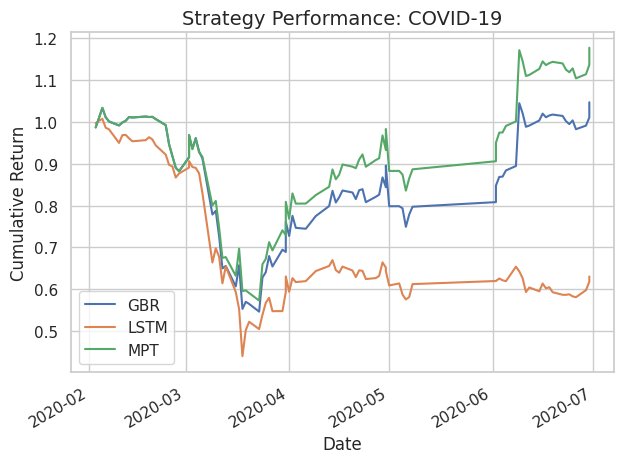

<Figure size 1000x500 with 0 Axes>

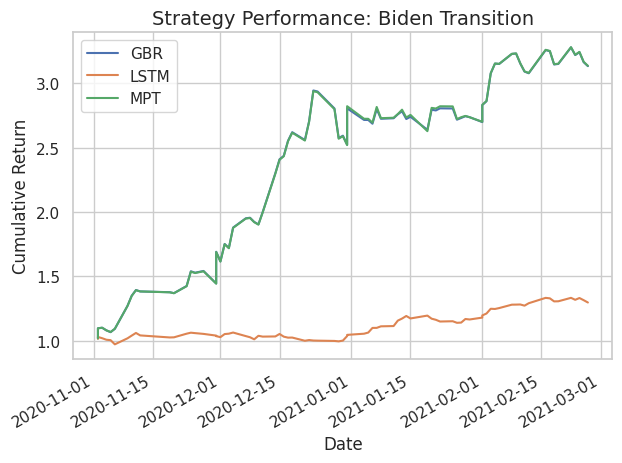

<Figure size 1000x500 with 0 Axes>

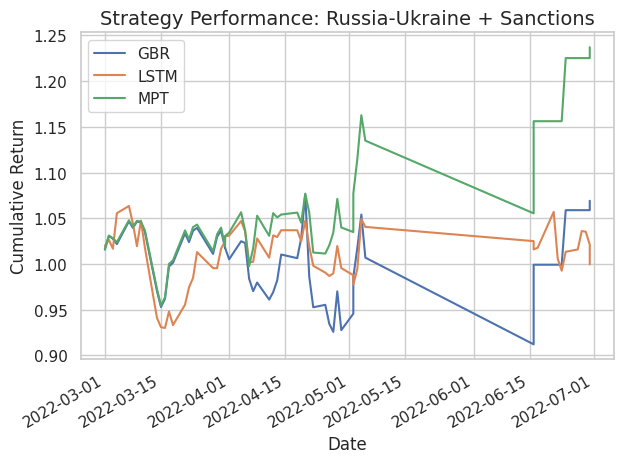

<Figure size 1000x500 with 0 Axes>

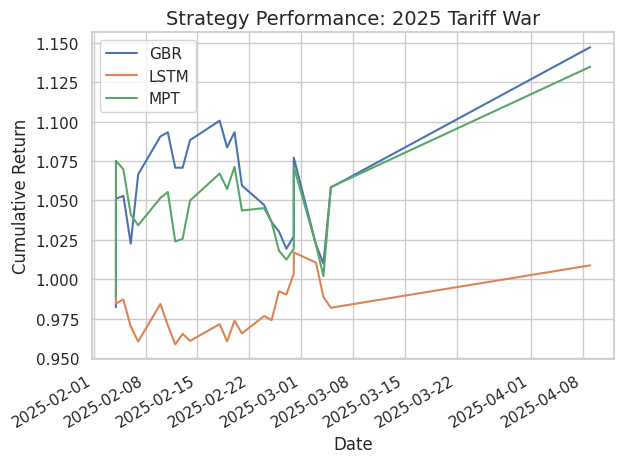

In [ ]:
# Print a simple summary of performance during distress periods
print("Simple performance summary for each distress period:")
print("===================================================")

for start_date, end_date, label in distressed_periods:
    print(f"\n{label} Period:")

    try:
        # Convert to dates
        start = pd.to_datetime(start_date)
        end = pd.to_datetime(end_date)

        # Check if we have data in this range
        mask = (portfolio_returns_df.index >= start) & (portfolio_returns_df.index <= end)
        if not any(mask):
            print("  No data available for this period")
            continue

        # Get returns during this period
        period_returns = portfolio_returns_df.loc[mask]

        # Calculate cumulative return for the period
        cum_return = (1 + period_returns).prod() - 1

        # Calculate volatility during the period
        volatility = period_returns.std() * np.sqrt(min(252, len(period_returns)))

        # Print simple results for each strategy
        print("  Strategy   | Total Return | Volatility")
        print("  -----------|--------------|------------")

        for strategy in portfolio_returns_df.columns:
            print(f"  {strategy:10} | {cum_return[strategy]:11.2%} | {volatility[strategy]:10.2%}")

    except Exception as e:
        print(f"  Error calculating metrics: {e}")

# Create a simple plot of cumulative returns during each period
for start_date, end_date, label in distressed_periods:
    try:
        # Convert to dates
        start = pd.to_datetime(start_date)
        end = pd.to_datetime(end_date)

        # Check if we have data in this range
        mask = (portfolio_returns_df.index >= start) & (portfolio_returns_df.index <= end)
        if not any(mask):
            continue

        # Get returns during this period
        period_returns = portfolio_returns_df.loc[mask]

        # Plot cumulative returns for this period
        plt.figure(figsize=(10, 5))
        (1 + period_returns).cumprod().plot()

        plt.title(f'Strategy Performance: {label}', fontsize=14)
        plt.ylabel('Cumulative Return')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error plotting {label}: {e}")

**Figure 7.2 Portfolio PerformanceDuring Specific Market Distress Periods**

The chart highlights the strategies' risk management systems in various ways. Having less than 35% in maximum losses, MPT (green) reports shallower and shorter falls in market value during most periods.

During COVID-19, LSTM saw a horrible 48% decrease in value and struggled for many years on the way back up. Despite recovering recently, there are big issues when it comes to handling risks due to the vessel’s time spent underwater.

When compared to LSTM, GBR (blue) faces bigger setbacks (58% during COVID-19) but has quicker times to get back on track. After 2024, all strategies had to deal with large drawdowns that even MPT fell victim to.


#### **COVID-19 Crisis**

One can see from the chart that markets experienced great uncertainty during the first days of the pandemic caused by COVID-19. All the strategies lost significant ground in March of 2020, but their aftermath has seen very different developments.

MPT (green) coped well with the crisis, first restoring what it had lost and then surging ahead to reach 15% above its initial levels by July. GBR only partially bounced back and was still less than fully underwater by 10%. The major highlight is how LSTM performs: recovering in May as GBR did, but then sees a significant decline in June-July while other methods were stable.

Even the statistics prove it: MPT achieved a 17.75% positive return which was much better than both machine learning methods and came with lower month-to-month changes (45.36%) in a global crisis. With figures like 10.69% and 33.45% for GBR and LSTM demonstrate how hard it was for them to adjust to the unexpected nature of the markets.

#### **Russia-Ukraine Conflict**
The Russia-Ukraine chart makes it easier to see that the strategies differ in performance. MPT kept growing steadily, gaining 23.73% and having the least amount of volatility of all the strategies (at 20.76%).

It is notable that after a sharp increase earlier in June, LSTM plummeted in late June, losing all its earlier success and finishing down 20%. GBR performed worse at first, but recovered later to record a 4.91% return, accompanied by stronger volatility than MPT.

We can then say, traditional portfolio theory is clear in impressive crisis handling abilities, leaving volatility low even as it achieves high returns when the market is stressed.

## **7.2 Summary of Key Findings and Results**

### **7.2.1 Key Performance Metrics**

| Strategy | Annual Return | Volatility | Sharpe Ratio | Max Drawdown |
| -------- | ------------- | ---------- | ------------ | ------------ |
| MPT      | 0.944840      | 0.483655   | 1.953543     | 0.574782     |
| GBR      | 0.822242      | 0.509043   | 1.615270     | 0.727416     |
| LSTM     | 0.262220      | 0.329355   | 0.796162     | 0.620475     |

**Table 7.2 Key Performance Summary Table**

### **7.2.2 Strategy Resilience Through Market Shocks**

The strategies were easily differentiated by their performance during very stressful times. MPT performed better, mostly when there were large market declines due to COVID-19 and the Russia-Ukraine war. For instance:

COVID-19 showed a 17.75% return and an annualized return of 72.51%. Loss for GBR was -10.69% and for LSTM, it was -33.45%.

MPT went up by 23.73% during the Russia-Ukraine conflict while experiencing less volatility (42.55%). GBR yielded 4.91%, whereas LSTM fell 20%.

MPT was very stable, but LSTM moved irregularly and took a long time to recover. GBR scored better than LSTM, yet still fell behind MPT.

### **7.2.3 Risk Management and Drawdowns**

MPT becomes more resilient as a result of drawdown analysis. The maximum loss for LSTM reached almost 48% during COVID-19, while for the market that number was only around 35%. GBR lost about 58% in values but recovered more rapidly than LSTM.

All the strategies was affected in 2024, MPT was able to reduce losses and quickly reagin its strength.


### **7.2.3 Crisis-Specific Performance**

#### **COVID-19 Crash**

In March 2020, there was a sharp drop in the stock market. Within two months, MPT had recovered and climbed above the level it was before the crisis arose. The GBR improved a little but continued to fall below zero, while the LSTM went up again, only to fall again when half the year had passed.

#### **Russia-Ukraine Conflict**

Despite the uncertainty in markets, MPT kept going up, letting investors enjoy smaller swings in their investments. GBR improved somewhat, whereas LSTM performed poorly because it did not generalize well.

#### **2025 Tariff War**

Surprisingly, it was during this time that LSTM started gaining popularity. While the strategys results were still volatile, it managed better with nonlinear patterns which may point to DL models outperforming in extremely distinct shifts.

## **7.3. Final Evaluation and Implications**

Despite being simple and first introduced decades ago, MPT performed better than more sophisticated versions in the highly unstable energy sector. GBR works well as an alternative, since it provides improved performance measured against risks. Most of the time, LSTM did not impress, but it was able to detect shifts in what defines the market.

Apparently, strong results with LSTM and GBR can only be expected with further refinement in practical situations. To gain strong results, both traditional and up-to-date approaches can be applied by institutional investors in the energy sector.


## **7.4 Conclusion**

This research demonstrated that MTP classical portfolio optimization is still relevant in crisis areas such as the energy sector. Still, models like MPT may outperform ML and DL when markets are in crisis. The best option could be to unite how traditional models work with the flexibility of ML/DL to manage future changes in the market.

# **8.0 REFERENCES**

1. Ban, G.-Y., Boyd, S., & Tebaldi, C. (2018). Machine learning and portfolio optimization. Management Science, 64(3),
1136-1154. https://doi.org/10.1287/mnsc.2016.2644

2. Routledge, B., Sadka, R., & Wu, L. (2019). Machine learning and asset allocation. Financial Management, 48(4), 1069-
1094. https://doi.org/10.1111/fima.12303

3. Bollinger, J. (2002). Bollinger on Bollinger Bands. McGraw Hill.

4. Chan, E. (2013). Algorithmic Trading: Winning Strategies and Their Rationale. Wiley.

5. Hull, J. C. (2017). Options, Futures, and Other Derivatives (10th ed.). Pearson.

6. Murphy, J. J. (1999). Technical Analysis of the Financial Markets. New York Institute of Finance.

7. Tsay, R. S. (2010). Analysis of Financial Time Series (3rd ed.). Wiley.

8. Wilder, J. W. (1978). New Concepts in Technical Trading Systems. Trend Research.
9. Brownlee, J. (2017). Deep Learning for Time Series Forecasting: Predict the Future with MLPs, CNNs and LSTMs in Python. Machine Learning Mastery.

10. **OpenAI. (2025).** *ChatGPT [Large language model]*. Retrieved from [https://chat.openai.com](https://chat.openai.com)  


11. **Yahoo Finance. (2025).** *Historical Stock Price Data*. Retrieved from [https://finance.yahoo.com](https://finance.yahoo.com)  
  

12. **Grammarly Inc. (2025).** *Grammarly Writing Assistant*. Retrieved from [https://www.grammarly.com](https://www.grammarly.com)     